In [1]:
username_cols = {2018: 17, 2019: 18}
protected_cols = {'Gender': {2018: 18, 2019: 20}, 
                  'Prior_exp': {2018: 24, 2019: 25}}
pretest_filenames = {2018: "Datasets/2018_REFLECT_Pretest.csv",
                     2019: "Datasets/2019_REFLECT_Pretest.csv"}

In [2]:
from abroca import *
import pandas as pd
import csv
import numpy as np

from copy import deepcopy

import tensorflow
tensorflow.random.set_seed(2)
from tensorflow.keras.models import load_model

from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_fscore_support, accuracy_score
from statistics import mean, median
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt

import import_ipynb
from build_models import *
from evaluation import *
from bias_mitigation import bias_postprocessing
from bias_inspection import *

from fetch_data import *
from training_methods import *

from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

/home/agupta44/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


importing Jupyter notebook from build_models.ipynb
importing Jupyter notebook from preprocessing.ipynb
importing Jupyter notebook from fetch_data.ipynb
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


importing Jupyter notebook from evaluation.ipynb
importing Jupyter notebook from bias_mitigation.ipynb
importing Jupyter notebook from bias_inspection.ipynb
importing Jupyter notebook from training_methods.ipynb


In [3]:
from bias_inspection import *

In [4]:
import pickle
with open('dataset.pkl', 'rb') as f:
    x = pickle.load(f)

In [5]:
x['1A0003']

{'pretest': 9.0,
 'posttest': 13.0,
 'tutorial_complete': True,
 'logs': [{'event': [0, 0, 0, 0, 1, 0, 0, 0],
   'goal': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   'response_emb': [0.19300055706580865,
    -0.18410546716809484,
    -0.04879944829001959,
    -0.8675356332697732,
    -0.8435272970406813,
    0.2968947538226063,
    -0.46147871363536686,
    -0.6913215273817284,
    0.7334789169736233,
    -0.885711141798667,
    0.4061960687666397,
    0.6460993814404072,
    0.7930749511935087,
    0.3185202326785179,
    -0.8927308017995381,
    -0.1248254792474568,
    0.749024935520239,
    -0.17894319370700829,
    0.07070817516042949,
    0.4856005698715362,
    0.15407610954935014,
    -0.27883630555698735,
    0.18439933859474356,
    -0.07105955892610316,
    -0.3345476633785591,
    -0.8603838103271726,
    -0.47918834231408347,
    0.990184513927084,
    -0.4145413539920857,
    -0.303247947946913,
    0.9621681654266707,
    -0.7944690146726305],
   'nex

In [6]:
get_reflection_attempts(x)

4.931034482758621 1.0852700560011659


In [5]:
x_train, x_held = create_train_test_split(x)
#x_train = filter_students(x_train)

In [6]:
get_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1
mean:  1.0521056686733914  stdev:  0.11881811079153942
2
mean:  0.9624710169146153  stdev:  0.10197916309736554
1
Mean:  0.4684803054289885
Stdev:  0.7372037645985604
2
Mean:  0.42436950245007055
Stdev:  0.7234314551269531


In [6]:
get_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1
mean:  1.024256509998244  stdev:  0.05859566438967186
2
mean:  0.9798687437135196  stdev:  0.05158362982745781
1
Mean:  0.4684803054289885
Stdev:  0.7372037645985604
2
Mean:  0.42436950245007055
Stdev:  0.7234314551269531


In [6]:
get_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1
mean:  7.3824173839196945  stdev:  5.223563487516412
2
mean:  7.283568676400396  stdev:  5.613720674628648
1
Mean:  2
Stdev:  6.557438524302
2
Mean:  2
Stdev:  6.557438524302


In [5]:
get_pretest_reflect_stats(x, get_late_fusion_mtl)

1B0043
1B0048
1B0051
1B0053
1B0054
1B0055
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r1829
r2658
r3934
r3945
r4564
r5341
r7242
r7523
r8172
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s4784
s5377
s5842
s6712
s7515
s7699
s8718
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
1B0054
1B0055
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r1829
r2658
r3934
r3945
r4564
r5341
r7242
r7523
r8172
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s4784
s5377
s5842
s6712
s7515
s7699
s8718
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
1B0054
1B0055
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r1829
r2658
r3934
r3945
r4564
r5341
r7242
r7523
r8172
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s4784
s5377
s5842
s6712
s7515
s7699
s8718
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
A

ValueError: x and y must have length at least 2.

In [5]:
get_pretest_reflect_stats(x, get_late_fusion_mtl)

1B0043
1B0048
1B0051
1B0053
1B0054
1B0055
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r1829
r2658
r3934
r3945
r4564
r5341
r7242
r7523
r8172
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s4784
s5377
s5842
s6712
s7515
s7699
s8718
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
1B0054
1B0055
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r1829
r2658
r3934
r3945
r4564
r5341
r7242
r7523
r8172
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s4784
s5377
s5842
s6712
s7515
s7699
s8718
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
1B0054
1B0055
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r1829
r2658
r3934
r3945
r4564
r5341
r7242
r7523
r8172
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s4784
s5377
s5842
s6712
s7515
s7699
s8718
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
A

ValueError: x and y must have length at least 2.

In [6]:
get_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1
mean:  0.02558727085045818  stdev:  1.024256509998244
2
mean:  -0.011970941528974023  stdev:  0.9798687437135196
1
Mean:  0.4684803054289885
Stdev:  0.7372037645985604
2
Mean:  0.42436950245007055
Stdev:  0.7234314551269531


In [7]:
get_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1
mean:  0.03638600181277685  stdev:  1.039511986374732
2
mean:  -0.022618467418192092  stdev:  0.9687126810054693
1
Mean:  0.44316423089415546
Stdev:  0.7404570069297562
2
Mean:  0.44054102481776003
Stdev:  0.7227213206439489


In [6]:
get_gender_r_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.6,
   0.8,
   0.8,
   1.0,
   0.6,
   0.6,
   0.7,
   0.7,
   0.8,
   0.7,
   0.7,
   0.5,
   0.6,
   0.6,
   0.7,
   0.9,
   0.7,
   0.7,
   1.0,
   0.5,
   1.0,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.8,
   0.4,
   0.4,
   0.5,
   0.7,
   0.4,
   0.4,
   0.6,
   0.4,
   0.4,
   0.4,
   0.5,
   0.8,
   0.9,
   0.6,
   0.5,
   1.0,
   0.4,
   0.5,
   0.3,
   0.3,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.5,
   0.4,
   0.4,
   0.3,
   0.3,
   0.2,
   0.4,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.2,
   0.2,
   0.4,
   0.6,
   0.4,
   0.3,
   0.4,
   0.2,
   0.2,
   0.4,
   0.3,
   0.4,
   0.2,
   0.3,
   0.4,
   0.4,
   0.8,
   0.3,
   0.3,
   0.4,
   0.3,
   0.4,
   0.4,
   0.4,
   0.4,
   0.3,
   0.2,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.4,
   0.6,
   0.6,
   0.5,
   0.4,
   0.3,
   0.7,
   0.4,
   0.6,
   0.5],
  'Read

In [7]:
get_gender_r_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.4,
   0.4,
   0.9,
   0.9,
   0.9,
   0.3,
   0.5,
   0.4,
   0.7,
   0.5,
   0.7,
   0.8,
   0.4,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.7,
   0.8,
   0.4,
   0.6,
   0.3,
   0.5,
   0.4,
   0.3,
   0.5,
   0.2,
   0.5,
   0.5,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.6,
   0.4,
   0.2,
   0.2,
   0.4,
   0.5,
   0.5,
   0.4,
   0.3,
   0.2,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.3,
   0.2,
   0.2,
   0.2,
   0.5,
   0.8,
   0.4,
   0.4,
   0.4,
   0.5,
   0.3,
   0.5,
   0.4,
   0.3,
   0.4,
   0.4,
   0.7,
   0.6,
   0.4,
   0.4,
   0.4,
   0.2,
   0.3,
   0.4,
   0.4,
   0.5,
   0.5,
   0.8,
   0.3,
   0.4,
   0.6,
   0.4,
   0.4,
   0.5,
   1.0,
   0.4,
   0.3,
   0.7,
   0.4,
   0.5,
   0.5],
  'Readings': [28,
   18,
   20,
   25,
   22,
   33,
   19,
   16,
   43,
   30,
   17,
   16,
   28,
   9,
   24,
   23,
   25,
   28,
   54,
   19,
   26,
   17,
   21,
   48,
   38,
   16,
   16,
   7,
   18,
  

In [6]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
A

{'1': {'Ratings': [0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.29411764705882354,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.17647058823529413,
   0.23529411764705882,
   0.35294117647058826,
   0.23529411764705882,
   0.7647058823529411,
   0.29411764705882354,
   0.17647058823529413,
   0.17647058823529413,
   0.4117647058823529,
   0.29411764705882354,
   0.17647058823529413,
   0.4117647058823529,
   0.5882352941176471,
   0.6470588235294118,
   0.23529411764705882,
   0.17647058823529413,
   0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.7647058823529411,
   0.7647058823529411,
   0.4117647058823529],
  'Readings': [19.838709677419356,
   24,
   17.3015873015873,
   29.48076923076923,
   15.406976744186046,
   24.392265193370164,
   29.159817351598175,
   20.03787878787879,
   48.0

In [7]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
A

{'1': {'Ratings': [-0.09090909090909094,
   -0.8333333333333335,
   0.4000000000000001,
   0.13333333333333333,
   -0.5714285714285714,
   -0.1428571428571429,
   0.45454545454545464,
   0.33333333333333337,
   -0.5,
   0.0,
   -0.5000000000000001,
   0.25000000000000006,
   0.15384615384615388,
   0.13333333333333333,
   -0.08333333333333336,
   0.3750000000000001,
   0.08333333333333336,
   -0.4999999999999999,
   0.13333333333333333,
   -0.625,
   -0.09090909090909094,
   -0.4444444444444444,
   -0.5555555555555555,
   0.2,
   0.25,
   -0.07692307692307691,
   -0.18181818181818188,
   -0.20000000000000007,
   0.42857142857142844,
   0.07692307692307694,
   0.0,
   -0.16666666666666669,
   0.0,
   0.75,
   0.1666666666666667,
   0.0,
   0.1428571428571429,
   -0.3333333333333333,
   -0.6666666666666669,
   0.4999999999999999,
   0.6923076923076922,
   0.27272727272727276],
  'Readings': [23.177083333333332,
   27.4,
   27.541284403669724,
   11,
   16.76865671641791,
   22.8303571428

In [6]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
A

{'1': {'Ratings': [0.4999999999999999,
   0.4000000000000001,
   0.0,
   0.0,
   0.08333333333333336,
   0.33333333333333337,
   0.3333333333333334,
   0.1428571428571429,
   0.0,
   0.6,
   -0.37499999999999994,
   -0.08333333333333336,
   -0.27272727272727276,
   -0.3,
   -0.09999999999999992,
   -0.4444444444444444,
   0.33333333333333315,
   -0.09090909090909094,
   -0.16666666666666669,
   -0.5555555555555555,
   0.16666666666666663,
   0.25,
   -0.07692307692307691,
   0.09090909090909086,
   0.12500000000000003,
   0.45454545454545464,
   -0.18181818181818188,
   -0.16666666666666669,
   0.4999999999999999,
   0.25000000000000006,
   -0.3,
   0.42857142857142844,
   0.6923076923076922,
   0.3333333333333333],
  'Readings': [19.838709677419356,
   24,
   17.3015873015873,
   29.48076923076923,
   15.406976744186046,
   24.392265193370164,
   29.159817351598175,
   20.03787878787879,
   48.05714285714286,
   37.46808510638298,
   15.946902654867257,
   10.482993197278912,
   31.16

In [8]:
get_gender_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
16 1A00032
92 1A00033
93 1A00034
97 1A00081
141 1A00082
183 1A00083
189 1A00084
193 1A00111
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
318 1A00152
352 1A00153
354 1A00221
380 1A00222
462 1A00223
464 1A00241
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
603 1A00252
642 1A00253
697 1A00254
699 1A00261
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
834 1B00391
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
972 1B00402
999 1B00403
1094 1B00411
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
2012 2A00842
2072 2A00843
2167 2A00844
2173 2A00845
2175 2A00881
2201 2A00882
2209 2A00883
2393 2A00884
2395 2B00911
2426 2B00912
2526 2B00913

{'1': {'Ratings': [0.4,
   0.4,
   0.4,
   0.9,
   0.4,
   0.9,
   0.9,
   0.3,
   0.4,
   0.5,
   0.4,
   0.8,
   0.7,
   0.5,
   0.7,
   0.5,
   0.8,
   0.4,
   0.5,
   0.6,
   0.6,
   0.4,
   0.5,
   0.4,
   0.5,
   0.4,
   0.4,
   0.5,
   0.7,
   0.4,
   0.7,
   0.8,
   0.8,
   0.5,
   0.4,
   0.4,
   0.6,
   0.3,
   0.4,
   0.5,
   0.4,
   0.3,
   0.4,
   0.5,
   0.2,
   0.5,
   0.5,
   0.4,
   0.4,
   0.4,
   0.2,
   0.6,
   0.6,
   0.4,
   0.6,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.2,
   0.4,
   0.5,
   0.5,
   0.5,
   0.4,
   0.3,
   0.3,
   0.2,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.4,
   0.3,
   0.2,
   0.2,
   0.2,
   0.4,
   0.5,
   0.4,
   0.8,
   0.4,
   0.4,
   0.4,
   0.5,
   0.3,
   0.6,
   0.5,
   0.4,
   0.3,
   0.4,
   0.4,
   0.4,
   0.7,
   0.6,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.2,
   0.3,
   0.5,
   0.4,
   0.4,
   0.5,
   0.5,
   0.5,
   0.8,
   0.4,
   0.3,
   0.4,
   0.6,
   0.5,
   0.4,
   0.4,
   0.5,
   1.0,
   0.4,


In [7]:
get_gender_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
16 1A00032
92 1A00033
93 1A00034
97 1A00081
141 1A00082
183 1A00083
189 1A00084
193 1A00111
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
318 1A00152
352 1A00153
354 1A00221
380 1A00222
462 1A00223
464 1A00241
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
603 1A00252
642 1A00253
697 1A00254
699 1A00261
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
834 1B00391
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
972 1B00402
999 1B00403
1094 1B00411
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
2012 2A00842
2072 2A00843
2167 2A00844
2173 2A00845
2175 2A00881
2201 2A00882
2209 2A00883
2393 2A00884
2395 2B00911
2426 2B00912
2526 2B00913

{'1': {'Ratings': [0.7,
   0.6,
   0.8,
   0.8,
   1.0,
   0.5,
   0.6,
   0.6,
   0.7,
   0.7,
   0.7,
   0.8,
   0.7,
   0.7,
   0.5,
   0.3,
   0.4,
   0.6,
   0.6,
   0.7,
   0.9,
   0.6,
   0.7,
   0.7,
   1.0,
   0.7,
   0.5,
   1.0,
   0.5,
   0.6,
   0.6,
   0.4,
   0.5,
   0.4,
   0.7,
   0.4,
   0.6,
   0.8,
   0.8,
   0.4,
   0.4,
   0.4,
   0.5,
   0.6,
   0.7,
   0.4,
   0.4,
   0.6,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.5,
   0.8,
   0.4,
   0.9,
   0.6,
   0.5,
   1.0,
   0.4,
   0.4,
   0.5,
   0.3,
   0.3,
   0.4,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.5,
   0.6,
   0.4,
   0.4,
   0.3,
   0.3,
   0.3,
   0.2,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.2,
   0.4,
   0.4,
   0.6,
   0.4,
   0.2,
   0.2,
   0.4,
   0.4,
   0.6,
   0.4,
   0.3,
   0.3,
   0.4,
   0.2,
   0.2,
   0.2,
   0.4,
   0.3,
   0.4,
   0.4,
   0.2,


In [6]:
get_exp_game_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # ratings

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs


{'1': {'Ratings': [0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.29411764705882354,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.17647058823529413,
   0.23529411764705882,
   0.35294117647058826,
   0.23529411764705882,
   0.7647058823529411,
   0.29411764705882354,
   0.17647058823529413,
   0.17647058823529413,
   0.4117647058823529,
   0.29411764705882354,
   0.17647058823529413,
   0.4117647058823529,
   0.5882352941176471,
   0.6470588235294118,
   0.23529411764705882,
   0.17647058823529413,
   0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.7647058823529411,
   0.7647058823529411,
   0.4117647058823529],
  'Readings': [1298.875988875862,
   805.7206086317074,
   1875.7276982027024,
   879.4554423999999,
   607.5385154040817,
   491.992970754054,
   1212.44470390625,
   896.45353997391

In [10]:
get_exp_game_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # ratings

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
163.8354444
172.1810312
4.7664545
8.4290751
7.6306234
70.846281
76.5811025
143.6254536
228.6394846
2.5732716
2.695323
91.7157519
131.5313217
179.6513037
4.4980401
137.1363992
3.2126274
12.5133668
5.9223926
314.6689455
77.9818031
82.2062221
106.1298971
124.9999459
104.3762408
7.5174287
155.0576816
3.2604753
2.4320228
98.0978232
123.7615465
3.279428
3.5719732
3.8622105
143.3026396
1.5569636
59.0038134
4.1954228
5.9125694
6.9199806
65.4717955
49.6392356
4.152474
3.0404763
6.100258
138.597255
49.1310211
1.6353695
6.8494926
3.6869886
1.9527949
44.1589971
57.8286852
39.2635409
77.6603773
70.798006
53.4885834
63.3603214
144.2584516
44.706269
1.2235779
26.1704292
3.937739
3.5809945
4.2159715
4.6336121
2.1992165
5.3319164
5.803959
114.557126
9.3241595
1.79614
1.8196794
2.0603424
3.3593738
119.3350719
4.7491113
9.0582418
14.0598319
2.390991
63.9722905
109.9361743
9.2669664
2.4895052
2.8624155
6.6021671
2.2915432
41.3504522
74.5138415
103.3005682
70.2180118
4.880209
2.5780376
78.5237706


190.2705651
127.4507565
383.9442745
4.7246305
4.9503775
75.2072694
2.5558876
159.2851433
95.2568323
91.3689731
44.1303095
2.4989651
99.3632323
4.7017167
171.3704883
2.2977741
6.3838667
5.0525345
6.7159163
64.0133571
14.2048572
3.1051279
7.0263325
2.7866268
256.7570379
1.5119469
2.9596986
1.4720674
161.2280358
87.6730877
62.5359314
14.8071463
42.9231649
143.0492796
16.0069396
106.1893229
220.5581995
33.1389799
3.3271729
113.9230113
3.0324102
175.2448181
2.886716
319.4252037
4.711695
13.6739044
10.3080797
82.6857166
39.8258346
83.8899484
36.2998096
210.5756655
1.6123353
159.0543945
1.6177847
140.6167275
2.4922117
4.3800374
13.4550131
14.9801793
3.1469024
7.7679911
190.5487352
44.57919
177.0672588
4.6006601
37.0728177
74.2643869
7.536497
77.2358967
63.3811042
6.2766926
1.7908835
1.5033339
6.0940117
5.3034766
1.8797136
2.0978706
1.6238017
9.8029337
2.8280446
1.4383222
1.7223783
3.1289514
1.9623131
2.4409185
1.9046858
3.0291164
2.0346537
2.699972
5.2031447
7.2495917
2.0856937
3.0973306
20.3

38.1157232
85.1052465
55.9457386
54.2543682
2.9737979
57.3796965
58.9842022
47.2350295
10.4282306
99.51367
185.8920607
127.0771374
4.6792614
1.6779115
4.7555024
7.166158
4.027347
3.3080934
1.6401625
2.2014686
2.4882327
8.2523212
6.3755609
25.4645816
68.1919294
3.3756593
1.5350395
125.6732169
43.4617261
91.811834
60.3583895
12.0304276
14.6469426
52.3749671
3.2298592
93.5145074
80.0775161
24.0794211
37.0592774
55.3956387
23.9378285
45.6940394
48.5498287
86.3983871
62.9077437
2.0853755
31.3379934
1.6642735
2.3876584
36.6165344
199.7179584
1.5835041
76.8694268
1.5692625
125.879792
2.5255099
5.7811157
1.6011688
1.9968541
3.4553708
12.2050782
2.1547585
3.4295013
3.4589085
2.1513431
2.6014976
4.1657329
19.4061134
8.9597785
1.7274931
3.3845407
15.47642
1.9905746
1.841652
3.110928
3.9730623
2.3522115
5.3804818
2.1910045
1.7328324
1.5044788
1.4723418
1.7050967
1.5398886
3.1056196
14.2547647
4.5336797
16.9675805
8.4473719
2.7777944
37.7258398
16.7085057
61.1904746
3.109312
72.5744715
75.3520177
4

{'1': {'Ratings': [0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.29411764705882354,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.17647058823529413,
   0.23529411764705882,
   0.35294117647058826,
   0.23529411764705882,
   0.7647058823529411,
   0.29411764705882354,
   0.17647058823529413,
   0.17647058823529413,
   0.4117647058823529,
   0.29411764705882354,
   0.17647058823529413,
   0.4117647058823529,
   0.5882352941176471,
   0.6470588235294118,
   0.23529411764705882,
   0.17647058823529413,
   0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.7647058823529411,
   0.7647058823529411,
   0.4117647058823529],
  'Readings': [18.81188118811881,
   20.44859813084112,
   18.157894736842106,
   20.10185185185185,
   26.011494252873565,
   29.71641791044776,
   34.04347826086956,
   29.624113475

In [9]:
get_exp_gametrace_stats(x_train, get_late_fusion_mtl) # ratings

1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956
1B0043
1B0048
1B0051
1B0053
2A0063
2A0067
2A0075
3B0148
3B0156
3B0158
3B0167
r2658
r3934
r3945
r4564
r5341
r9769
s0718
s0911
s1308
s1557
s2207
s3852
s4744
s5377
s5842
s6712
s7515
s7699
s8944
s9214
s9956


The `lr` argument is deprecated, use `learning_rate` instead.


got logs


{'1': {'Ratings': [0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.29411764705882354,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.17647058823529413,
   0.23529411764705882,
   0.35294117647058826,
   0.23529411764705882,
   0.7647058823529411,
   0.29411764705882354,
   0.17647058823529413,
   0.17647058823529413,
   0.4117647058823529,
   0.29411764705882354,
   0.17647058823529413,
   0.4117647058823529,
   0.5882352941176471,
   0.6470588235294118,
   0.23529411764705882,
   0.17647058823529413,
   0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.7647058823529411,
   0.7647058823529411,
   0.4117647058823529],
  'Readings': [0.08265528326990387,
   0.7201315781599751,
   -0.5367010948997728,
   0.4083210095082624,
   0.40451556427682267,
   0.7040041395619753,
   2.2397794132357465,
   1.82

In [6]:
get_exp_game_stats(x_train, get_late_fusion_mtl, protected_label="Gender") # ratings

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
163.8354444
172.1810312
4.7664545
8.4290751
7.6306234
70.846281
76.5811025
143.6254536
228.6394846
2.5732716
2.695323
91.7157519
131.5313217
179.6513037
4.4980401
137.1363992
3.2126274
12.5133668
5.9223926
314.6689455
77.9818031
82.2062221
106.1298971
124.9999459
104.3762408
7.5174287
155.0576816
3.2604753
2.4320228
98.0978232
123.7615465
3.279428
3.5719732
3.8622105
143.3026396
1.5569636
59.0038134
4.1954228
5.9125694
6.9199806
65.4717955
49.6392356
4.152474
3.0404763
6.100258
138.597255
49.1310211
1.6353695
6.8494926
3.6869886
1.9527949
44.1589971
57.8286852
39.2635409
77.6603773
70.798006
53.4885834
63.3603214
144.2584516
44.706269
1.2235779
26.1704292
3.937739
3.5809945
4.2159715
4.6336121
2.1992165
5.3319164
5.803959
114.557126
9.3241595
1.79614
1.8196794
2.0603424
3.3593738
119.3350719
4.7491113
9.0582418
14.0598319
2.390991
63.9722905
109.9361743
9.2669664
2.4895052
2.8624155
6.6021671
2.2915432
41.3504522
74.5138415
103.3005682
70.2180118
4.880209
2.5780376
78.5237706


26.4481754
53.1185715
4.9308705
50.7302554
86.4974621
56.8422159
130.032979
10.1642165
10.1071068
17.0431778
6.7457185
66.7113312
55.76221
9.5871407
3.8076454
20.632569
18.1406267
23.1815322
8.5746474
3.3239027
3.3307005
24.4712763
58.3215323
77.47021
43.4014349
147.0843245
4.6665225
2.7432029
142.061706
61.4846433
4.9236096
3.6615838
4.9282887
92.0753561
135.333483
140.5869092
48.6247414
2.1686453
82.5744354
5.1659937
149.2671205
3.6838654
10.2608576
4.1414852
69.3580773
85.8047792
83.7896605
48.9094363
5.8832654
71.2774806
3.6505141
166.2184176
3.09166
1.9269111
39.8777061
17.7985854
17.7054187
84.1627711
4.3956607
5.7860407
2.030383
1.9679561
5.3804038
1.6691022
2.2294806
1.7848535
2.0030147
1.2716704
2.3063438
4.8647323
1.5046453
1.5242799
6.1762886
1.9930927
1.6103655
1.3585265
1.2132723
1.6455506
1.893844
3.0380113
2.3866193
27.7983997
60.3246798
72.3819317
1.8212625
30.9511306
2.6989662
1.8460921
1.609234
4.9549239
2.245557
1.7096483
2.7125539
1.7340378
1.8098658
1.3760322
1.584

2.2270381
2.0692638
1.8356665
1.7281057
2.1238867
2.2617617
3.975595
1.6266195
107.9403086
4.4082892
1.379966
4.8771955
5.6888987
171.9328494
3.8381203
74.5358294
7.1657027
6.9585656
125.6588824
4.0179761
101.9904964
61.7502088
38.3793466
59.2778564
153.3665999
2.2829023
3.4547437
3.4948346
53.6354429
171.1985191
61.6409848
2.2887686
42.161628
1.6429387
1.4755848
40.985107
163.4596844
3.4915978
53.3393696
94.0202651
42.1889219
38.4497825
64.7952226
1.4162742
1.3714656
46.6535402
7.3266604
1.8700821
3.1048596
1.9293014
11.98656
2.0933901
15.3691111
7.5327537
238.7635579
1.4881047
2.6937032
2.2042967
2.4720439
1.9596133
67.3095047
200.9729403
79.3104647
1.8124439
81.9465518
45.0549933
8.8527588
3.7013404
3.1893187
3.9464897
2.530048
2.4776502
52.4311265
114.0619974
2.4646842
3.4910507
2.5054448
2.2807984
2.6589906
2.7393683
4.7434007
3.7922161
2.425201
1.2609901
2.2112371
23.2882864
1.2631759
1.6957069
2.695663
2.9858244
1.8723315
4.3495419
1.6956981
3.3235635
1.8194758
2.5532081
8.97605

{'1': {'Ratings': [0.29411764705882354,
   0.35294117647058826,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.5294117647058824,
   0.29411764705882354,
   0.29411764705882354,
   0.47058823529411764,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.23529411764705882,
   0.7058823529411765,
   0.35294117647058826,
   0.11764705882352941,
   0.23529411764705882,
   0.23529411764705882,
   0.29411764705882354,
   0.23529411764705882,
   0.17647058823529413,
   0.29411764705882354,
   0.29411764705882354,
   0.17647058823529413,
   0.23529411764705882,
   0.6470588235294118,
   0.7647058823529411,
   0.29411764705882354,
   0.4117647058823529,
   0.17647058823529413,
   0.5294117647058824,
   0.9411764705882353,
   0.7058823529411765,
   0.17647058823529413,
   0.6470588235294118,
   0.7647058823529411,
   0.4117647058823529,
   0.7647058823529411,
   0.7647058823529411,
   0.529411764705

In [7]:
get_exp_game_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # ratings

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
163.8354444
172.1810312
4.7664545
8.4290751
7.6306234
70.846281
76.5811025
143.6254536
228.6394846
2.5732716
2.695323
91.7157519
131.5313217
179.6513037
4.4980401
137.1363992
3.2126274
12.5133668
5.9223926
314.6689455
77.9818031
82.2062221
106.1298971
124.9999459
104.3762408
7.5174287
155.0576816
3.2604753
2.4320228
98.0978232
123.7615465
3.279428
3.5719732
3.8622105
143.3026396
1.5569636
59.0038134
4.1954228
5.9125694
6.9199806
65.4717955
49.6392356
4.152474
3.0404763
6.100258
138.597255
49.1310211
1.6353695
6.8494926
3.6869886
1.9527949
44.1589971
57.8286852
39.2635409
77.6603773
70.798006
53.4885834
63.3603214
144.2584516
44.706269
1.2235779
26.1704292
3.937739
3.5809945
4.2159715
4.6336121
2.1992165
5.3319164
5.803959
114.557126
9.3241595
1.79614
1.8196794
2.0603424
3.3593738
119.3350719
4.7491113
9.0582418
14.0598319
2.390991
63.9722905
109.9361743
9.2669664
2.4895052
2.8624155
6.6021671
2.2915432
41.3504522
74.5138415
103.3005682
70.2180118
4.880209
2.5780376
78.5237706


1.983023
3.0292982
1.9297908
5.3995576
1.6215763
2.8889695
3.1430214
3.8815269
1.6691629
1.7674185
26.8996759
2.2010473
204.9579667
11.1198892
108.8266741
53.0264078
5.5712971
2.2318061
7.3931826
9.0833176
112.1682929
75.4269528
2.5789956
26.4481754
53.1185715
4.9308705
50.7302554
86.4974621
56.8422159
130.032979
10.1642165
10.1071068
17.0431778
6.7457185
66.7113312
55.76221
9.5871407
3.8076454
20.632569
18.1406267
23.1815322
8.5746474
3.3239027
3.3307005
24.4712763
58.3215323
77.47021
43.4014349
147.0843245
4.6665225
2.7432029
142.061706
61.4846433
4.9236096
3.6615838
4.9282887
92.0753561
135.333483
140.5869092
48.6247414
2.1686453
82.5744354
5.1659937
149.2671205
3.6838654
10.2608576
4.1414852
69.3580773
85.8047792
83.7896605
48.9094363
5.8832654
71.2774806
3.6505141
166.2184176
3.09166
1.9269111
39.8777061
17.7985854
17.7054187
84.1627711
4.3956607
5.7860407
2.030383
1.9679561
5.3804038
1.6691022
2.2294806
1.7848535
2.0030147
1.2716704
2.3063438
4.8647323
1.5046453
1.5242799
6.17628

60.1356248
89.444912
9.6057545
5.4775461
8.2458671
1.9555351
2.5524359
5.433705
7.0376272
30.1917415
39.6515031
36.3081407
71.6150863
3.3852831
71.7713208
104.0019358
3.0768182
2.098451
116.568117
64.5657573
71.6499691
55.3822573
126.538033
59.9475373
42.2390856
82.1584511
32.8962717
26.9766021
16.9834256
139.8155475
3.0905617
52.0028788
8.207027
2.3649518
2.8608683
2.2388563
31.5845059
5.8007505
1.4706147
14.3461461
2.8854277
1.5284296
3.4209369
7.4208179
1.9395401
1.9505683
1.4747209
21.1185703
2.3118464
29.2611414
33.0293436
3.791917
1.8564195
2.3798271
44.2876173
27.6610104
2.2270381
2.0692638
1.8356665
1.7281057
2.1238867
2.2617617
3.975595
1.6266195
107.9403086
4.4082892
1.379966
4.8771955
5.6888987
171.9328494
3.8381203
74.5358294
7.1657027
6.9585656
125.6588824
4.0179761
101.9904964
61.7502088
38.3793466
59.2778564
153.3665999
2.2829023
3.4547437
3.4948346
53.6354429
171.1985191
61.6409848
2.2887686
42.161628
1.6429387
1.4755848
40.985107
163.4596844
3.4915978
53.3393696
94.020

{'1': {'Ratings': [0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.29411764705882354,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.17647058823529413,
   0.23529411764705882,
   0.35294117647058826,
   0.23529411764705882,
   0.7647058823529411,
   0.29411764705882354,
   0.17647058823529413,
   0.17647058823529413,
   0.4117647058823529,
   0.29411764705882354,
   0.17647058823529413,
   0.4117647058823529,
   0.5882352941176471,
   0.6470588235294118,
   0.23529411764705882,
   0.17647058823529413,
   0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.7647058823529411,
   0.7647058823529411,
   0.4117647058823529],
  'Readings': [29,
   41,
   37,
   37,
   49,
   37,
   64,
   46,
   34,
   31,
   29,
   26,
   27,
   25,
   15,
   19,
   2,
   70,
   24,
   46,
   37,
   11,
   28,
   33,
   5

In [6]:
get_exp_game_stats(x_train, get_late_fusion_mtl, protected_label="Gender") # ratings

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
163.8354444
172.1810312
4.7664545
8.4290751
7.6306234
70.846281
76.5811025
143.6254536
228.6394846
2.5732716
2.695323
91.7157519
131.5313217
179.6513037
4.4980401
137.1363992
3.2126274
12.5133668
5.9223926
314.6689455
77.9818031
82.2062221
106.1298971
124.9999459
104.3762408
7.5174287
155.0576816
3.2604753
2.4320228
98.0978232
123.7615465
3.279428
3.5719732
3.8622105
143.3026396
1.5569636
59.0038134
4.1954228
5.9125694
6.9199806
65.4717955
49.6392356
4.152474
3.0404763
6.100258
138.597255
49.1310211
1.6353695
6.8494926
3.6869886
1.9527949
44.1589971
57.8286852
39.2635409
77.6603773
70.798006
53.4885834
63.3603214
144.2584516
44.706269
1.2235779
26.1704292
3.937739
3.5809945
4.2159715
4.6336121
2.1992165
5.3319164
5.803959
114.557126
9.3241595
1.79614
1.8196794
2.0603424
3.3593738
119.3350719
4.7491113
9.0582418
14.0598319
2.390991
63.9722905
109.9361743
9.2669664
2.4895052
2.8624155
6.6021671
2.2915432
41.3504522
74.5138415
103.3005682
70.2180118
4.880209
2.5780376
78.5237706


24.4712763
58.3215323
77.47021
43.4014349
147.0843245
4.6665225
2.7432029
142.061706
61.4846433
4.9236096
3.6615838
4.9282887
92.0753561
135.333483
140.5869092
48.6247414
2.1686453
82.5744354
5.1659937
149.2671205
3.6838654
10.2608576
4.1414852
69.3580773
85.8047792
83.7896605
48.9094363
5.8832654
71.2774806
3.6505141
166.2184176
3.09166
1.9269111
39.8777061
17.7985854
17.7054187
84.1627711
4.3956607
5.7860407
2.030383
1.9679561
5.3804038
1.6691022
2.2294806
1.7848535
2.0030147
1.2716704
2.3063438
4.8647323
1.5046453
1.5242799
6.1762886
1.9930927
1.6103655
1.3585265
1.2132723
1.6455506
1.893844
3.0380113
2.3866193
27.7983997
60.3246798
72.3819317
1.8212625
30.9511306
2.6989662
1.8460921
1.609234
4.9549239
2.245557
1.7096483
2.7125539
1.7340378
1.8098658
1.3760322
1.5849586
1.3830059
2.3484254
1.3399549
1.8762973
2.0517656
381.9394431
6.2187348
25.0210038
131.3348201
303.4828318
6.1591079
107.5070058
166.7325642
85.8486215
307.4491847
211.6783859
47.0407502
119.8279108
150.86675
154.685

4.4082892
1.379966
4.8771955
5.6888987
171.9328494
3.8381203
74.5358294
7.1657027
6.9585656
125.6588824
4.0179761
101.9904964
61.7502088
38.3793466
59.2778564
153.3665999
2.2829023
3.4547437
3.4948346
53.6354429
171.1985191
61.6409848
2.2887686
42.161628
1.6429387
1.4755848
40.985107
163.4596844
3.4915978
53.3393696
94.0202651
42.1889219
38.4497825
64.7952226
1.4162742
1.3714656
46.6535402
7.3266604
1.8700821
3.1048596
1.9293014
11.98656
2.0933901
15.3691111
7.5327537
238.7635579
1.4881047
2.6937032
2.2042967
2.4720439
1.9596133
67.3095047
200.9729403
79.3104647
1.8124439
81.9465518
45.0549933
8.8527588
3.7013404
3.1893187
3.9464897
2.530048
2.4776502
52.4311265
114.0619974
2.4646842
3.4910507
2.5054448
2.2807984
2.6589906
2.7393683
4.7434007
3.7922161
2.425201
1.2609901
2.2112371
23.2882864
1.2631759
1.6957069
2.695663
2.9858244
1.8723315
4.3495419
1.6956981
3.3235635
1.8194758
2.5532081
8.9760514
27.8396832
2.779089
11.1680201
2.5543296
1.8738746
10.410089
4.2103119
2.4453053
3.64782

{'1': {'Ratings': [0.29411764705882354,
   0.35294117647058826,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.5294117647058824,
   0.29411764705882354,
   0.29411764705882354,
   0.47058823529411764,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.23529411764705882,
   0.7058823529411765,
   0.35294117647058826,
   0.11764705882352941,
   0.23529411764705882,
   0.23529411764705882,
   0.29411764705882354,
   0.23529411764705882,
   0.17647058823529413,
   0.29411764705882354,
   0.29411764705882354,
   0.17647058823529413,
   0.23529411764705882,
   0.6470588235294118,
   0.7647058823529411,
   0.29411764705882354,
   0.4117647058823529,
   0.17647058823529413,
   0.5294117647058824,
   0.9411764705882353,
   0.7058823529411765,
   0.17647058823529413,
   0.6470588235294118,
   0.7647058823529411,
   0.4117647058823529,
   0.7647058823529411,
   0.7647058823529411,
   0.529411764705

In [6]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # ratings

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.0,
   0.0,
   0.8333333333333334,
   0.8333333333333334,
   0.0,
   -6.000000000000003,
   0.16666666666666663,
   -0.19999999999999996,
   -0.5000000000000006,
   -0.6666666666666664,
   0.3999999999999999,
   0.6000000000000001,
   -2.0000000000000004,
   0.16666666666666663,
   0.0,
   -0.4999999999999999,
   0.16666666666666663,
   -0.19999999999999996,
   -0.19999999999999996,
   0.0,
   0.16666666666666663,
   -0.9999999999999997,
   0.4999999999999999,
   0.0,
   -0.19999999999999996,
   0.33333333333333326,
   -0.7499999999999999,
   0.16666666666666663,
   -0.19999999999999996,
   -0.16666666666666674,
   0.16666666666666663,
   -0.6,
   0.37499999999999994,
   0.0,
   0.0,
   0.0,
   -0.33333333333333337,
   0.0,
   -0.4999999999999999,
   0.33333333333333326,
   0.0,
   -0.33333333333333337,
   -0.33333333333333337,
   0.25,
   0.16666666666666663,
   0.0,
   -0.19999999999999996,
   0.0,
   -0.14285714285714282,
   0.25,
   0.0,
   0.16666666666666663,


In [6]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # ratings

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
(0.48988075350338994, 0.0032736964160641896) 0.44901960784313727 0.1363571992935032 22 12
(0.024464364401328386, 0.8553579492186836) 0.4459770114942529 0.13443660305878108 37 21


{'1': {'Ratings': [-0.27499999999999997,
   -0.019999999999999928,
   0.21538461538461542,
   0.690909090909091,
   0.2916666666666667,
   0.43333333333333335,
   0.055555555555555566,
   0.2714285714285713,
   0.7166666666666667,
   0.4333333333333333,
   -0.27499999999999997,
   0.15000000000000002,
   0.07272727272727274,
   -0.019999999999999928,
   0.32,
   -0.13333333333333328,
   -0.1333333333333335,
   0.07272727272727274,
   0.2916666666666667,
   -0.32222222222222224,
   0.15000000000000002,
   0.3625,
   0.21538461538461542,
   0.07272727272727274,
   0.14999999999999994,
   0.07272727272727274,
   0.07272727272727274,
   0.15000000000000002,
   -0.06250000000000001,
   -0.06250000000000001,
   -0.019999999999999928,
   -0.21428571428571436,
   0.21538461538461542,
   0.32],
  'Readings': [0.4,
   0.7333333333333334,
   0.45,
   0.6666666666666666,
   0.5666666666666667,
   0.525,
   0.43333333333333335,
   0.55,
   0.8,
   0.5,
   0.5,
   0.43333333333333335,
   0.4,
   0.4

In [6]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # ratings

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
(0.48988075350338994, 0.0032736964160641896) 0.44901960784313727 0.1363571992935032
(0.024464364401328386, 0.8553579492186836) 0.4459770114942529 0.13443660305878108


{'1': {'Ratings': [-0.27499999999999997,
   -0.019999999999999928,
   0.21538461538461542,
   0.690909090909091,
   0.2916666666666667,
   0.43333333333333335,
   0.055555555555555566,
   0.2714285714285713,
   0.7166666666666667,
   0.4333333333333333,
   -0.27499999999999997,
   0.15000000000000002,
   0.07272727272727274,
   -0.019999999999999928,
   0.32,
   -0.13333333333333328,
   -0.1333333333333335,
   0.07272727272727274,
   0.2916666666666667,
   -0.32222222222222224,
   0.15000000000000002,
   0.3625,
   0.21538461538461542,
   0.07272727272727274,
   0.14999999999999994,
   0.07272727272727274,
   0.07272727272727274,
   0.15000000000000002,
   -0.06250000000000001,
   -0.06250000000000001,
   -0.019999999999999928,
   -0.21428571428571436,
   0.21538461538461542,
   0.32],
  'Readings': [0.4,
   0.7333333333333334,
   0.45,
   0.6666666666666666,
   0.5666666666666667,
   0.525,
   0.43333333333333335,
   0.55,
   0.8,
   0.5,
   0.5,
   0.43333333333333335,
   0.4,
   0.4

In [7]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # ratings

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.0,
   0.0,
   0.8333333333333334,
   0.8333333333333334,
   0.0,
   -6.000000000000003,
   0.16666666666666663,
   -0.19999999999999996,
   -0.5000000000000006,
   -0.6666666666666664,
   0.3999999999999999,
   0.6000000000000001,
   -2.0000000000000004,
   0.16666666666666663,
   0.0,
   -0.4999999999999999,
   0.16666666666666663,
   -0.19999999999999996,
   -0.19999999999999996,
   0.0,
   0.16666666666666663,
   -0.9999999999999997,
   0.4999999999999999,
   0.0,
   -0.19999999999999996,
   0.33333333333333326,
   -0.7499999999999999,
   0.16666666666666663,
   -0.19999999999999996,
   -0.16666666666666674,
   0.16666666666666663,
   -0.6,
   0.37499999999999994,
   0.0,
   0.0,
   0.0,
   -0.33333333333333337,
   0.0,
   -0.4999999999999999,
   0.33333333333333326,
   0.0,
   -0.33333333333333337,
   -0.33333333333333337,
   0.25,
   0.16666666666666663,
   0.0,
   -0.19999999999999996,
   0.0,
   -0.14285714285714282,
   0.25,
   0.0,
   0.16666666666666663,


In [6]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # number of words

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
(0.4751379512290134, 0.0045163602022614815) 18.45098039215686 10.089292371545511
(0.13544001624231308, 0.3107226517186722) 15.719827586206897 9.982583496475195


{'1': {'Ratings': [-0.27499999999999997,
   -0.019999999999999928,
   0.21538461538461542,
   0.690909090909091,
   0.2916666666666667,
   0.43333333333333335,
   0.055555555555555566,
   0.2714285714285713,
   0.7166666666666667,
   0.4333333333333333,
   -0.27499999999999997,
   0.15000000000000002,
   0.07272727272727274,
   -0.019999999999999928,
   0.32,
   -0.13333333333333328,
   -0.1333333333333335,
   0.07272727272727274,
   0.2916666666666667,
   -0.32222222222222224,
   0.15000000000000002,
   0.3625,
   0.21538461538461542,
   0.07272727272727274,
   0.14999999999999994,
   0.07272727272727274,
   0.07272727272727274,
   0.15000000000000002,
   -0.06250000000000001,
   -0.06250000000000001,
   -0.019999999999999928,
   -0.21428571428571436,
   0.21538461538461542,
   0.32],
  'Readings': [22,
   26.666666666666668,
   17.5,
   30,
   17.666666666666668,
   25,
   33,
   19,
   48,
   38,
   16,
   12.666666666666666,
   27.25,
   19,
   21.666666666666668,
   8.5,
   0,
   

In [7]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # number of words

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [1.0222222222222224,
   1.035294117647059,
   1.0052631578947369,
   1.0041666666666667,
   1.0047619047619047,
   1.021875,
   1.0277777777777777,
   1.04,
   1.0071428571428571,
   1.0172413793103448,
   1.01875,
   1.0133333333333332,
   1.0222222222222224,
   1.0625,
   1.017391304347826,
   1.0272727272727273,
   1.0208333333333333,
   1.0222222222222224,
   1.0113207547169811,
   1.0333333333333334,
   1.02,
   1.0375,
   1.0150000000000001,
   1.0042553191489363,
   1.0162162162162163,
   1.0266666666666666,
   1.0466666666666666,
   1.0833333333333333,
   1.035294117647059,
   1.0583333333333333,
   1.0172413793103448,
   1.025,
   1.0454545454545454,
   1.0151515151515151,
   1.0461538461538462,
   1.0285714285714287,
   1.04,
   1.011764705882353,
   1.0315789473684212,
   1.0444444444444445,
   1.0999999999999999,
   1.088888888888889,
   1.0615384615384615,
   1.042857142857143,
   1.0357142857142858,
   1.0166666666666666,
   1.035294117647059,
   1.05833

In [6]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # number of words

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.4,
   0.4,
   0.9,
   0.9,
   0.9,
   0.3,
   0.5,
   0.4,
   0.7,
   0.5,
   0.7,
   0.8,
   0.4,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.7,
   0.8,
   0.4,
   0.6,
   0.3,
   0.5,
   0.4,
   0.3,
   0.5,
   0.2,
   0.5,
   0.5,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.6,
   0.4,
   0.2,
   0.2,
   0.4,
   0.5,
   0.5,
   0.4,
   0.3,
   0.2,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.3,
   0.2,
   0.2,
   0.2,
   0.5,
   0.8,
   0.4,
   0.4,
   0.4,
   0.5,
   0.3,
   0.5,
   0.4,
   0.3,
   0.4,
   0.4,
   0.7,
   0.6,
   0.4,
   0.4,
   0.4,
   0.2,
   0.3,
   0.4,
   0.4,
   0.5,
   0.5,
   0.8,
   0.3,
   0.4,
   0.6,
   0.4,
   0.4,
   0.5,
   1.0,
   0.4,
   0.3,
   0.7,
   0.4,
   0.5,
   0.5],
  'Reflect_length': [28,
   18,
   20,
   25,
   22,
   33,
   19,
   16,
   43,
   30,
   17,
   16,
   28,
   9,
   24,
   23,
   25,
   28,
   54,
   19,
   26,
   17,
   21,
   48,
   38,
   16,
   16,
   7,
   

In [6]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp") # number of words

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [-27.6,
   -17.6,
   -19.1,
   -24.1,
   -21.1,
   -32.7,
   -18.5,
   -15.6,
   -42.3,
   -29.5,
   -16.3,
   -15.2,
   -27.6,
   -8.5,
   -23.4,
   -22.6,
   -24.5,
   -27.6,
   -53.6,
   -18.6,
   -25.5,
   -16.6,
   -20.3,
   -47.2,
   -37.6,
   -15.4,
   -15.7,
   -6.5,
   -17.6,
   -12.7,
   -29.5,
   -32.8,
   -11.5,
   -33.5,
   -13.6,
   -21.6,
   -20.8,
   -34.4,
   -19.6,
   -9.4,
   -6.6,
   -9.8,
   -13.8,
   -14.6,
   -14.5,
   -30.5,
   -17.6,
   -12.7,
   -7.8,
   -7.6,
   -13.6,
   -20.5,
   -11.6,
   -6.6,
   -4.4,
   -8.7,
   -3.8,
   -2.8,
   -1.8,
   -16.5,
   -6.2,
   -12.6,
   -5.6,
   -9.6,
   -6.5,
   -5.7,
   -34.5,
   -29.6,
   -8.7,
   -12.6,
   -7.6,
   -10.3,
   -19.4,
   -9.6,
   -4.6,
   -7.6,
   -4.8,
   -0.7,
   -19.6,
   -13.6,
   -5.5,
   -31.5,
   -24.2,
   -12.7,
   -9.6,
   -5.4,
   -17.6,
   -8.6,
   -17.5,
   -23.0,
   -25.6,
   -21.7,
   -14.3,
   -14.6,
   -3.5,
   -25.5],
  'Reflect_length': [28,
   18,
   20,
   25,
   22,


In [6]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.23529411764705876,
   0.23529411764705876,
   0.23529411764705876,
   0.23529411764705888,
   0.23529411764705888,
   0.23529411764705888,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.05882352941176472,
   0.05882352941176472,
   0.05882352941176472,
   0.23529411764705882,
   0.23529411764705882,
   0.23529411764705882,
   0.23529411764705882,
   0.17647058823529416,
   0.17647058823529416,
   0.17647058823529416,
   0.05882352941176472,
   0.05882352941176472,
   0.0,
   0.5294117647058824,
   -0.1764705882352941,
   -0.1764705882352941,
   -0.05882352941176472,
   -0.05882352941176472,
   -0.05882352941176472,
   -0.17647058823529413,
   -0.17647058823529413,
   -0.17647058823529413,
   -0.17647058823529413,
   -0.1764705882352941,
   -0.1764705882352941,
   -0.1764705882352941,
   -0.05882352941176466,
   -0.05882352941176466,
   -0.05882352941176466,
   -0.23529411764705882,
   -0.23529411764705882,
   -0.05882352941176472,
   -0.05882352941176472,
   -0.05882

In [6]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
(0.2827084124607473, 0.11090686503545479)
(0.15703328468735497, 0.24775762893237183)


{'1': {'Ratings': [0.23529411764705876,
   0.23529411764705888,
   0.0,
   0.0,
   0.05882352941176472,
   0.23529411764705882,
   0.17647058823529416,
   0.05882352941176472,
   0.0,
   0.5294117647058824,
   -0.1764705882352941,
   -0.05882352941176472,
   -0.17647058823529413,
   -0.1764705882352941,
   -0.05882352941176466,
   -0.23529411764705882,
   -0.05882352941176472,
   -0.11764705882352941,
   -0.2941176470588235,
   0.11764705882352938,
   0.23529411764705882,
   -0.05882352941176469,
   0.05882352941176466,
   0.05882352941176472,
   0.29411764705882354,
   -0.11764705882352944,
   -0.11764705882352941,
   0.23529411764705876,
   0.11764705882352944,
   -0.1764705882352941,
   0.17647058823529405,
   0.5294117647058822,
   0.2941176470588235],
  'Readings': [22,
   26.666666666666668,
   17.5,
   30,
   17.666666666666668,
   25,
   33,
   19,
   48,
   38,
   16,
   12.666666666666666,
   27.25,
   19,
   21.666666666666668,
   8.5,
   14.666666666666666,
   24.5,
   10.7

In [6]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
(0.2929695436522947, 0.0980012812283928)
(0.17998188469980425, 0.18439214991775119)


{'1': {'Ratings': [0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.29411764705882354,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.17647058823529413,
   0.23529411764705882,
   0.35294117647058826,
   0.23529411764705882,
   0.29411764705882354,
   0.17647058823529413,
   0.17647058823529413,
   0.4117647058823529,
   0.29411764705882354,
   0.17647058823529413,
   0.4117647058823529,
   0.5882352941176471,
   0.6470588235294118,
   0.23529411764705882,
   0.17647058823529413,
   0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.7647058823529411,
   0.7647058823529411,
   0.4117647058823529],
  'Readings': [22,
   26.666666666666668,
   17.5,
   30,
   17.666666666666668,
   25,
   33,
   19,
   48,
   38,
   16,
   12.666666666666666,
   27.25,
   19,
   21.666666666666668,
   8.5,
   14.666666

In [7]:
get_exp_reflect_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
ALERT
(0.34999557309383766, 0.024881500816128548)
(0.31518780890825077, 0.03495056664215715)


{'1': {'Ratings': [0.29411764705882354,
   0.35294117647058826,
   0.6470588235294118,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.5294117647058824,
   0.29411764705882354,
   0.29411764705882354,
   0.47058823529411764,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.23529411764705882,
   0.7058823529411765,
   0.35294117647058826,
   0.11764705882352941,
   0.23529411764705882,
   0.23529411764705882,
   0.29411764705882354,
   0.23529411764705882,
   0.17647058823529413,
   0.29411764705882354,
   0.29411764705882354,
   0.17647058823529413,
   0.23529411764705882,
   0.6470588235294118,
   0.7647058823529411,
   0.29411764705882354,
   0.4117647058823529,
   0.17647058823529413,
   0.5294117647058824,
   0.9411764705882353,
   0.7058823529411765,
   0.17647058823529413,
   0.6470588235294118,
   0.7647058823529411,
   0.4117647058823529,
   0.7647058823529411,
   0.7647058823529411,
   0.5294117647058824],
  'Readings': [3.

In [7]:
get_exp_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Gender")

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs


{'1': {'Ratings': [0.29411764705882354,
   0.35294117647058826,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.5294117647058824,
   0.29411764705882354,
   0.29411764705882354,
   0.47058823529411764,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.23529411764705882,
   0.7058823529411765,
   0.35294117647058826,
   0.11764705882352941,
   0.23529411764705882,
   0.23529411764705882,
   0.29411764705882354,
   0.23529411764705882,
   0.17647058823529413,
   0.29411764705882354,
   0.29411764705882354,
   0.17647058823529413,
   0.23529411764705882,
   0.6470588235294118,
   0.7647058823529411,
   0.29411764705882354,
   0.4117647058823529,
   0.17647058823529413,
   0.5294117647058824,
   0.9411764705882353,
   0.7058823529411765,
   0.17647058823529413,
   0.6470588235294118,
   0.7647058823529411,
   0.4117647058823529,
   0.7647058823529411,
   0.7647058823529411,
   0.529411764705

In [6]:
get_exp_gametrace_stats(x_train, get_late_fusion_mtl, protected_label="Prior_exp")

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs


{'1': {'Ratings': [0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.29411764705882354,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.17647058823529413,
   0.23529411764705882,
   0.35294117647058826,
   0.23529411764705882,
   0.7647058823529411,
   0.29411764705882354,
   0.17647058823529413,
   0.17647058823529413,
   0.4117647058823529,
   0.29411764705882354,
   0.17647058823529413,
   0.4117647058823529,
   0.5882352941176471,
   0.6470588235294118,
   0.23529411764705882,
   0.17647058823529413,
   0.7647058823529411,
   0.6470588235294118,
   0.23529411764705882,
   0.7647058823529411,
   0.7647058823529411,
   0.4117647058823529],
  'Readings': [0.08265528326990387,
   0.7201315781599751,
   -0.5367010948997728,
   0.4083210095082624,
   0.40451556427682267,
   0.7040041395619753,
   2.2397794132357465,
   1.82

In [6]:
get_gender_reflection_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.29411764705882354,
   0.29411764705882354,
   0.29411764705882354,
   0.29411764705882354,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.5294117647058824,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.5294117647058824,
   0.5294117647058824,
   0.5294117647058824,
   0.5294117647058824,
   0.29411764705882354,
   0.29411764705882354,
   0.29411764705882354,
   0.47058823529411764,
   0.47058823529411764,
   0.47058823529411764,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.23529411764705882,
   0.23529411764705882,
   0.23529411764705882,
   0.7058823529411

In [6]:
get_gender_reflection_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.29411764705882354,
   0.29411764705882354,
   0.29411764705882354,
   0.29411764705882354,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.35294117647058826,
   0.5294117647058824,
   0.5294117647058824,
   0.5294117647058824,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.5294117647058824,
   0.5294117647058824,
   0.5294117647058824,
   0.5294117647058824,
   0.29411764705882354,
   0.29411764705882354,
   0.29411764705882354,
   0.47058823529411764,
   0.47058823529411764,
   0.47058823529411764,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.6470588235294118,
   0.35294117647058826,
   0.23529411764705882,
   0.23529411764705882,
   0.23529411764705882,
   0.23529411764705882,
   0.7058823529411

In [6]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.4,
   0.4,
   0.9,
   0.9,
   0.9,
   0.3,
   0.5,
   0.4,
   0.7,
   0.5,
   0.7,
   0.8,
   0.4,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.7,
   0.8,
   0.4,
   0.6,
   0.3,
   0.5,
   0.4,
   0.3,
   0.5,
   0.2,
   0.5,
   0.5,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.6,
   0.4,
   0.2,
   0.2,
   0.4,
   0.5,
   0.5,
   0.4,
   0.3,
   0.2,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.3,
   0.2,
   0.2,
   0.2,
   0.5,
   0.8,
   0.4,
   0.4,
   0.4,
   0.5,
   0.3,
   0.5,
   0.4,
   0.3,
   0.4,
   0.4,
   0.7,
   0.6,
   0.4,
   0.4,
   0.4,
   0.2,
   0.3,
   0.4,
   0.4,
   0.5,
   0.5,
   0.8,
   0.3,
   0.4,
   0.6,
   0.4,
   0.4,
   0.5,
   1.0,
   0.4,
   0.3,
   0.7,
   0.4,
   0.5,
   0.5],
  'Reflect_length': [2.0,
   2.0,
   2.0,
   2.0,
   4.5,
   4.5,
   2.0,
   2.5,
   4.0,
   3.5,
   2.5,
   2.5,
   4.0,
   2.0,
   3.0,
   3.0,
   2.0,
   2.5,
   2.5,
   2.0,
   2.0,
   3.5,
   2.0,
   4.0,
   2.

In [6]:
get_exp_reflection_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.4,
   0.4,
   0.9,
   0.9,
   0.9,
   0.3,
   0.5,
   0.4,
   0.7,
   0.5,
   0.7,
   0.8,
   0.4,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.7,
   0.8,
   0.4,
   0.6,
   0.3,
   0.5,
   0.4,
   0.3,
   0.5,
   0.2,
   0.5,
   0.5,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.6,
   0.4,
   0.2,
   0.2,
   0.4,
   0.5,
   0.5,
   0.4,
   0.3,
   0.2,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.3,
   0.2,
   0.2,
   0.2,
   0.5,
   0.8,
   0.4,
   0.4,
   0.4,
   0.5,
   0.3,
   0.5,
   0.4,
   0.3,
   0.4,
   0.4,
   0.7,
   0.6,
   0.4,
   0.4,
   0.4,
   0.2,
   0.3,
   0.4,
   0.4,
   0.5,
   0.5,
   0.8,
   0.3,
   0.4,
   0.6,
   0.4,
   0.4,
   0.5,
   1.0,
   0.4,
   0.3,
   0.7,
   0.4,
   0.5,
   0.5],
  'Reflect_length': [28,
   18,
   20,
   25,
   22,
   33,
   19,
   16,
   43,
   30,
   17,
   16,
   28,
   9,
   24,
   23,
   25,
   28,
   54,
   19,
   26,
   17,
   21,
   48,
   38,
   16,
   16,
   7,
   

In [6]:
get_gender_reflection_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.6,
   0.8,
   0.8,
   1.0,
   0.6,
   0.6,
   0.7,
   0.7,
   0.8,
   0.7,
   0.7,
   0.5,
   0.6,
   0.6,
   0.7,
   0.9,
   0.7,
   0.7,
   1.0,
   0.5,
   1.0,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.8,
   0.4,
   0.4,
   0.5,
   0.7,
   0.4,
   0.4,
   0.6,
   0.4,
   0.4,
   0.4,
   0.5,
   0.8,
   0.9,
   0.6,
   0.5,
   1.0,
   0.4,
   0.5,
   0.3,
   0.3,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.5,
   0.4,
   0.4,
   0.3,
   0.3,
   0.2,
   0.4,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.2,
   0.2,
   0.4,
   0.6,
   0.4,
   0.3,
   0.4,
   0.2,
   0.2,
   0.4,
   0.3,
   0.4,
   0.2,
   0.3,
   0.4,
   0.4,
   0.8,
   0.3,
   0.3,
   0.4,
   0.3,
   0.4,
   0.4,
   0.4,
   0.4,
   0.3,
   0.2,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.4,
   0.6,
   0.6,
   0.5,
   0.4,
   0.3,
   0.7,
   0.4,
   0.6,
   0.5],
  'Refl

In [6]:
get_gender_reflection_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
ALERT
16 1A00032
92 1A00033
93 1A00034
97 1A00081
ALERT
141 1A00082
183 1A00083
189 1A00084
193 1A00111
ALERT
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
ALERT
318 1A00152
352 1A00153
354 1A00221
ALERT
380 1A00222
462 1A00223
464 1A00241
ALERT
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
ALERT
603 1A00252
642 1A00253
697 1A00254
699 1A00261
ALERT
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
ALERT
834 1B00391
ALERT
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
ALERT
972 1B00402
999 1B00403
1094 1B00411
ALERT
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
ALERT
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
ALERT
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
ALERT
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
ALERT
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
ALERT
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
ALERT
2012 2A00842
2072 2A00843
2167 2A0

{'1': {'Ratings': [0.6,
   0.8,
   0.8,
   1.0,
   0.6,
   0.6,
   0.7,
   0.7,
   0.8,
   0.7,
   0.7,
   0.5,
   0.6,
   0.6,
   0.7,
   0.9,
   0.7,
   0.7,
   1.0,
   0.5,
   1.0,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.8,
   0.4,
   0.4,
   0.5,
   0.7,
   0.4,
   0.4,
   0.6,
   0.4,
   0.4,
   0.4,
   0.5,
   0.8,
   0.9,
   0.6,
   0.5,
   1.0,
   0.4,
   0.5,
   0.3,
   0.3,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.5,
   0.4,
   0.4,
   0.3,
   0.3,
   0.2,
   0.4,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.2,
   0.2,
   0.4,
   0.6,
   0.4,
   0.3,
   0.4,
   0.2,
   0.2,
   0.4,
   0.3,
   0.4,
   0.2,
   0.3,
   0.4,
   0.4,
   0.8,
   0.3,
   0.3,
   0.4,
   0.3,
   0.4,
   0.4,
   0.4,
   0.4,
   0.3,
   0.2,
   0.5,
   0.6,
   0.4,
   0.5,
   0.4,
   0.4,
   0.6,
   0.4,
   0.6,
   0.6,
   0.5,
   0.4,
   0.3,
   0.7,
   0.4,
   0.6,
   0.5],
  'Refl

In [6]:
get_gametrace_stats(x_train, get_late_fusion_mtl) #males: M=1.02, females: 0.98

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1
0 1.0306541273260836
1 1.0520554519089342
2 1.0723331509377125
3 1.0294703229574644
4 1.0221693049250296
5 0.9479458714284146
6 0.933072070728408
7 1.1063517797739046
2
0 0.9812410917219863
1 0.9547100981208977
2 0.9483498231273744
3 0.9832475054563339
4 0.97114791989287
5 1.0300036999561397
6 1.0698054105764065
7 0.9004444008561482


{'1': [[-1.3687081083231623,
   -1.3687081083231623,
   -1.3687081083231623,
   -1.3687081083231623,
   -1.3687081083231623,
   -1.2390415104130992,
   -1.2390415104130992,
   -1.2390415104130992,
   -1.1093749125030363,
   -1.1093749125030363,
   -0.9797083145929733,
   -0.9797083145929733,
   -0.9797083145929733,
   -0.9797083145929733,
   -0.8500417166829102,
   -0.8500417166829102,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.7203751187728472,
   -0.5907085208627841,
   -0.5907085208627841,
   -0.4610419229527211,
   -0.4610419229527211,
   -0.4610419229527211,
   -0.4610419229527211,
   -0.3313753250426581,
   -0.3313753250426581,
   -0.3313753250426581,
   -0.33137

In [6]:
get_gender_gametrace_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
16 1A00032
92 1A00033
93 1A00034
97 1A00081
141 1A00082
183 1A00083
189 1A00084
193 1A00111
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
318 1A00152
352 1A00153
354 1A00221
380 1A00222
462 1A00223
464 1A00241
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
603 1A00252
642 1A00253
697 1A00254
699 1A00261
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
834 1B00391
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
972 1B00402
999 1B00403
1094 1B00411
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
2012 2A00842
2072 2A00843
2167 2A00844
2173 2A00845
2175 2A00881
2201 2A00882
2209 2A00883
2393 2A00884
2395 2B00911
2426 2B00912
2526 2B00913

{'1': {'Ratings': [0.6,
   0.8,
   0.8,
   1.0,
   0.3,
   0.6,
   0.6,
   0.7,
   0.7,
   0.9,
   0.8,
   0.7,
   0.7,
   0.5,
   0.9,
   0.6,
   0.6,
   0.6,
   0.7,
   0.9,
   0.5,
   0.7,
   0.7,
   1.0,
   0.3,
   0.5,
   1.0,
   0.5,
   0.7,
   0.6,
   0.4,
   0.5,
   0.4,
   0.8,
   0.4,
   0.6,
   0.5,
   0.8,
   0.8,
   0.4,
   0.4,
   0.5,
   0.6,
   0.7,
   0.4,
   0.4,
   0.6,
   0.5,
   0.4,
   -0.2,
   0.4,
   0.4,
   0.3,
   0.5,
   0.8,
   0.5,
   0.9,
   0.6,
   0.5,
   1.0,
   0.7,
   0.4,
   0.5,
   0.3,
   0.3,
   0.4,
   0.4,
   0.4,
   0.2,
   0.6,
   0.3,
   0.4,
   0.5,
   -0.2,
   0.4,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.5,
   0.6,
   0.4,
   0.4,
   0.3,
   0.2,
   0.3,
   0.2,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   -0.2,
   0.4,
   0.4,
   0.4,
   0.5,
   -0.2,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.4,
   0.2,
   0.2,
   0.2,
   0.4,
   0.6,
   0.4,
   0.3,
   0.7,
   0.4,
   0.2,
   0.2,
   0.3,
   0.4,
   0.3,
   0.6,
   0.4,
   0.2,
   0

In [6]:
get_gender_gametrace_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs
1 1A00031
16 1A00032
92 1A00033
93 1A00034
97 1A00081
141 1A00082
183 1A00083
189 1A00084
193 1A00111
194 1A00112
217 1A00113
233 1A00114
288 1A00115
290 1A00151
318 1A00152
352 1A00153
354 1A00221
380 1A00222
462 1A00223
464 1A00241
480 1A00242
533 1A00243
572 1A00244
573 1A00245
577 1A00251
603 1A00252
642 1A00253
697 1A00254
699 1A00261
731 1A00262
742 1A00263
797 1A00264
807 1A00265
830 1B00351
834 1B00391
835 1B00392
846 1B00393
891 1B00394
967 1B00395
971 1B00401
972 1B00402
999 1B00403
1094 1B00411
1124 1B00412
1199 1B00413
1205 1B00414
1207 1B00471
1217 1B00472
1250 1B00473
1359 1B00474
1361 1B00581
1400 1B00582
1521 1B00583
1568 1B00584
1635 2A00641
1683 2A00642
1694 2A00643
1720 2A00644
1724 2A00791
1725 2A00792
1761 2A00793
1773 2A00794
1837 2A00795
1839 2A00811
1849 2A00812
1862 2A00813
1918 2A00814
1986 2A00815
1993 2A00841
2012 2A00842
2072 2A00843
2167 2A00844
2173 2A00845
2175 2A00881
2201 2A00882
2209 2A00883
2393 2A00884
2395 2B00911
2426 2B00912
2526 2B00913

{'1': {'Ratings': [0.7,
   0.6,
   0.8,
   0.8,
   1.0,
   0.5,
   0.6,
   0.6,
   0.7,
   0.7,
   0.7,
   0.8,
   0.7,
   0.7,
   0.5,
   0.3,
   0.4,
   0.6,
   0.6,
   0.7,
   0.9,
   0.6,
   0.7,
   0.7,
   1.0,
   0.7,
   0.5,
   1.0,
   0.5,
   0.6,
   0.6,
   0.4,
   0.5,
   0.4,
   0.7,
   0.4,
   0.6,
   0.8,
   0.8,
   0.4,
   0.4,
   0.4,
   0.5,
   0.6,
   0.7,
   0.4,
   0.4,
   0.6,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.5,
   0.8,
   0.4,
   0.9,
   0.6,
   0.5,
   1.0,
   0.4,
   0.4,
   0.5,
   0.3,
   0.3,
   0.4,
   0.4,
   0.4,
   0.2,
   0.6,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.5,
   0.6,
   0.4,
   0.4,
   0.3,
   0.3,
   0.3,
   0.2,
   0.4,
   0.4,
   0.4,
   0.2,
   0.4,
   0.4,
   0.4,
   0.4,
   0.4,
   0.5,
   0.4,
   0.4,
   0.2,
   0.4,
   0.4,
   0.6,
   0.4,
   0.2,
   0.2,
   0.4,
   0.4,
   0.6,
   0.4,
   0.3,
   0.3,
   0.4,
   0.2,
   0.2,
   0.2,
   0.4,
   0.3,
   0.4,
   0.4,
   0.2,


In [6]:
get_gametrace_stats(x_train, get_late_fusion_mtl)

r3934
r4564
r3934
r4564
r3934
r4564


The `lr` argument is deprecated, use `learning_rate` instead.


got logs


{'1': [0.025745741421399425,
  0.01502377967239726,
  0.0026891135946366545,
  -0.001493374703352865,
  0.06106460184968795,
  -0.03765683377162055,
  -0.006137052185045326,
  0.035377473961177366],
 '2': [-0.012600286311547906,
  -0.012098686151379419,
  0.005735957395587309,
  0.0028173989448785504,
  -0.04959353719548049,
  0.029888231758305836,
  0.019869361922812193,
  -0.033100046617815806]}

In [ ]:
['Conversation': males (0.039), 'BooksAndArticles': male (0.027), 'Worksheet': females (0.0027), 
 'Prompts': females (0.0043), 'PlotPoint': males, 'Posters': females (0.07), 'Scanner': females (0.026), 
 'WorksheetSubmit': males (0.068)]

In [8]:
def reassign_gender(data):
    for s_id in data:
        if data[s_id]['Gender'] == '1':
            data[s_id]['Gender'] = 'male'
        elif data[s_id]['Gender'] == '2':
            data[s_id]['Gender'] = 'female'
        
    return

In [9]:
def reassign_exp(data):
    for s_id in data:
        if data[s_id]['Prior_exp'] == '2':
            data[s_id]['Prior_exp'] = '1'
        elif data[s_id]['Prior_exp'] == '4' or data[s_id]['Prior_exp'] == '5' or data[s_id]['Prior_exp'] == '3':
            data[s_id]['Prior_exp'] = '2'
        if data[s_id]['Prior_exp'] == '1':
            data[s_id]['Prior_exp'] = 'low_exp'
        else:
            data[s_id]['Prior_exp'] = 'high_exp'
    
    return

In [10]:
def get_dict(data):
    studies = [2018, 2019]
    data_dict = {}
    for s_id in data:
        if data[s_id]['tutorial_complete'] == False:
            continue
        data_dict[s_id] = {}
        data_dict[s_id]['s_id'] = s_id
        found = False
        for year in studies:
            with open(pretest_filenames[year]) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                for row in csv_reader:
                    if row[username_cols[year]] == s_id or row[username_cols[year]] in s_id:
                        found = True
                        for protected_label in protected_cols:
                            data_dict[s_id][protected_label] = row[protected_cols[protected_label][year]]
            if found == True:
                break
                
    for s_id in data:
        if data[s_id]['tutorial_complete'] == False:
            continue
        data_dict[s_id]['pretest'] = float(data[s_id]['pretest']) /17.
        data_dict[s_id]['posttest'] = float(data[s_id]['posttest'])/17. 
        ratings = []
        data_dict[s_id]['emb'] = []
        for log in data[s_id]['logs']:
            data_dict[s_id]['emb'].append(deepcopy(log['response_emb']))
            if log['next_rating'] != -1:
                ratings.append(float(log['next_rating']))
        mean_ratings = sum(ratings)/len(ratings)
        data_dict[s_id]['mean_next_rating'] = mean_ratings/5
                
    reassign_gender(data_dict)
    reassign_exp(data_dict)
                
    return data_dict 

In [11]:
def get_exp_distribution(data, param='posttest'):
    data_dict = get_dict(data)
    
    df = pd.DataFrame(data=data_dict)
    
    pretests = {'low_exp': [], 'high_exp': []}
    for s_id in data_dict:
        if data_dict[s_id]['Prior_exp'] != '3':
            pretests[data_dict[s_id]['Prior_exp']].append(data_dict[s_id][param])
        
    bins = np.linspace(0,1,17)
    
    plt.hist(pretests['low_exp'], bins, alpha=0.5, label='low_exp')
    plt.hist(pretests['high_exp'], bins, alpha=0.5, label='high_exp')
    plt.legend(loc='upper right')
    plt.show()

In [12]:
def get_gender_distribution(data, param='posttest'):
    data_dict = get_dict(data)
    
    df = pd.DataFrame(data=data_dict)
    
    pretests = {'male': [], 'female': []}
    for s_id in data_dict:
        if data_dict[s_id]['Gender'] != '3':
            pretests[data_dict[s_id]['Gender']].append(data_dict[s_id][param])
        
    bins = np.linspace(0,1,18)
    
    plt.hist(pretests['male'], bins, alpha=0.5, label='male')
    plt.hist(pretests['female'], bins, alpha=0.5, label='female')
    plt.legend(loc='upper right')
    plt.show()

In [13]:
def get_table(data, dep_var='posttest', ind_var='Gender'):
    data_dict = get_dict(data)
    
    d = {}
    for s_id in data_dict:
        if data_dict[s_id][ind_var] == '3':
            continue
        d[s_id] = data_dict[s_id]
    data_dict = d
    
    lg = []
    for s_id in data_dict:
        lg.append(data_dict[s_id]['posttest'] - data_dict[s_id]['pretest'])
    avg_lg = mean(lg)
    print(avg_lg)
    
    results = {'low_exp': {'low_rating': {'low_posttest': 0, 'high_posttest': 0}, 
                           'high_rating': {'low_posttest': 0, 'high_posttest': 0}},
               'high_exp': {'low_rating': {'low_posttest': 0, 'high_posttest': 0}, 
                            'high_rating': {'low_posttest': 0, 'high_posttest': 0}}}
    
    for s_id in data_dict:
        if data_dict[s_id]['posttest'] < 6/17:
            if data_dict[s_id]['mean_next_rating'] <= 2.5/5:
                results[data_dict[s_id]['Prior_exp']]['low_rating']['low_posttest'] += 1
            else:
                results[data_dict[s_id]['Prior_exp']]['high_rating']['low_posttest'] += 1
        else:
            if data_dict[s_id]['mean_next_rating'] <= 2.5/5:
                results[data_dict[s_id]['Prior_exp']]['low_rating']['high_posttest'] += 1
            else:
                results[data_dict[s_id]['Prior_exp']]['high_rating']['high_posttest'] += 1
                
    print(results)
    
    results = {'male': {'low_exp': 0, 'high_exp': 0},
               'female': {'low_exp': 0, 'high_exp': 0}}
    
    for s_id in data_dict:
        results[data_dict[s_id]['Gender']][data_dict[s_id]['Prior_exp']] += 1
        
    male_count = results['male']['low_exp'] + results['male']['high_exp']
    female_count = results['female']['low_exp'] + results['female']['high_exp']
    lowexp_count = results['male']['low_exp'] + results['female']['low_exp']
    highexp_count = results['female']['high_exp'] + results['male']['high_exp']
    exp_counts = {'low_exp': lowexp_count, 'high_exp': highexp_count}
    gender_counts = {'male': male_count, 'female': female_count}
            
    print(results)
            
    results = {'male': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0},
               'female': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['pretest'] < 6/17:
            results[data_dict[s_id]['Gender']]['low_pretest'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_pretest'] += 1
        results[data_dict[s_id]['Gender']]['sum_pretest'] += data_dict[s_id]['pretest']
    results['male']['sum_pretest'] /= gender_counts['male']
    results['female']['sum_pretest'] /= gender_counts['female']
        
    print(results)
        
    results = {'male': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0},
               'female': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['posttest'] < 6/17:
            results[data_dict[s_id]['Gender']]['low_posttest'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_posttest'] += 1
        results[data_dict[s_id]['Gender']]['sum_posttest'] += data_dict[s_id]['posttest']
    results['male']['sum_posttest'] /= gender_counts['male']
    results['female']['sum_posttest'] /= gender_counts['female']
    
    print(results)
    
    results = {'male': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0},
               'female': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0}}
    
    for s_id in data_dict:
        lg = data_dict[s_id]['posttest'] - data_dict[s_id]['pretest']
        if lg <= avg_lg:
            results[data_dict[s_id]['Gender']]['low_lg'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_lg'] += 1
        results[data_dict[s_id]['Gender']]['sum_lg'] += lg
    results['male']['sum_lg'] /= gender_counts['male']
    results['female']['sum_lg'] /= gender_counts['female']
    
    print(results)
    
    results = {'male': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0},
               'female': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['mean_next_rating'] < 2.5/5:
            results[data_dict[s_id]['Gender']]['low_ratings'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_ratings'] += 1
        results[data_dict[s_id]['Gender']]['sum_ratings'] += data_dict[s_id]['mean_next_rating']
    results['male']['sum_ratings'] /= gender_counts['male']
    results['female']['sum_ratings'] /= gender_counts['female']
    
    print(results)
    
    results = {'low_exp': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0},
               'high_exp': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['pretest'] < 6/17:
            results[data_dict[s_id]['Prior_exp']]['low_pretest'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_pretest'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_pretest'] += data_dict[s_id]['pretest']
    results['low_exp']['sum_pretest'] /= exp_counts['low_exp']
    results['high_exp']['sum_pretest'] /= exp_counts['high_exp']
        
    print(results)
        
    results = {'low_exp': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0},
               'high_exp': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['posttest'] < 6/17:
            results[data_dict[s_id]['Prior_exp']]['low_posttest'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_posttest'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_posttest'] += data_dict[s_id]['posttest']
    results['low_exp']['sum_posttest'] /= exp_counts['low_exp']
    results['high_exp']['sum_posttest'] /= exp_counts['high_exp']
    
    print(results)
    
    results = {'low_exp': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0},
               'high_exp': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['mean_next_rating'] < 2.5/5:
            results[data_dict[s_id]['Prior_exp']]['low_ratings'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_ratings'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_ratings'] += data_dict[s_id]['mean_next_rating']
    results['low_exp']['sum_ratings'] /= exp_counts['low_exp']
    results['high_exp']['sum_ratings'] /= exp_counts['high_exp']
    
    print(results)
    
    results = {'low_exp': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0},
               'high_exp': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0}}
    
    for s_id in data_dict:
        lg = data_dict[s_id]['posttest'] - data_dict[s_id]['pretest']
        if lg <= avg_lg:
            results[data_dict[s_id]['Prior_exp']]['low_lg'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_lg'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_lg'] += lg
    results['low_exp']['sum_lg'] /= exp_counts['low_exp']
    results['high_exp']['sum_lg'] /= exp_counts['high_exp']
    
    print(results)

In [14]:
def get_table0(data, dep_var='posttest', ind_var='Gender'):
    data_dict = get_dict(data)
    
    d = {}
    for s_id in data_dict:
        if data_dict[s_id][ind_var] == '3':
            continue
        d[s_id] = data_dict[s_id]
    data_dict = d
    
    lg = []
    for s_id in data_dict:
        lg.append(data_dict[s_id]['posttest'] - data_dict[s_id]['pretest'])
    avg_lg = median(lg)
    print(avg_lg)
    
    results = {'male': {'low_exp': 0, 'high_exp': 0},
               'female': {'low_exp': 0, 'high_exp': 0}}
    
    for s_id in data_dict:
        results[data_dict[s_id]['Gender']][data_dict[s_id]['Prior_exp']] += 1
        
    male_count = results['male']['low_exp'] + results['male']['high_exp']
    female_count = results['female']['low_exp'] + results['female']['high_exp']
    lowexp_count = results['male']['low_exp'] + results['female']['low_exp']
    highexp_count = results['female']['high_exp'] + results['male']['high_exp']
    exp_counts = {'low_exp': lowexp_count, 'high_exp': highexp_count}
    gender_counts = {'male': male_count, 'female': female_count}
            
    print(results)
            
    results = {'male': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0},
               'female': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['pretest'] < 6/17:
            results[data_dict[s_id]['Gender']]['low_pretest'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_pretest'] += 1
        results[data_dict[s_id]['Gender']]['sum_pretest'] += data_dict[s_id]['pretest']
    results['male']['sum_pretest'] /= gender_counts['male']
    results['female']['sum_pretest'] /= gender_counts['female']
        
    print(results)
        
    results = {'male': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0},
               'female': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['posttest'] < 6/17:
            results[data_dict[s_id]['Gender']]['low_posttest'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_posttest'] += 1
        results[data_dict[s_id]['Gender']]['sum_posttest'] += data_dict[s_id]['posttest']
    results['male']['sum_posttest'] /= gender_counts['male']
    results['female']['sum_posttest'] /= gender_counts['female']
    
    print(results)
    
    results = {'male': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0},
               'female': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0}}
    
    for s_id in data_dict:
        lg = data_dict[s_id]['posttest'] - data_dict[s_id]['pretest']
        if lg <= avg_lg:
            results[data_dict[s_id]['Gender']]['low_lg'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_lg'] += 1
        results[data_dict[s_id]['Gender']]['sum_lg'] += lg
    results['male']['sum_lg'] /= gender_counts['male']
    results['female']['sum_lg'] /= gender_counts['female']
    
    print(results)
    
    results = {'male': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0},
               'female': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['mean_next_rating'] < 2.5/5:
            results[data_dict[s_id]['Gender']]['low_ratings'] += 1
        else:
            results[data_dict[s_id]['Gender']]['high_ratings'] += 1
        results[data_dict[s_id]['Gender']]['sum_ratings'] += data_dict[s_id]['mean_next_rating']
    results['male']['sum_ratings'] /= gender_counts['male']
    results['female']['sum_ratings'] /= gender_counts['female']
    
    print(results)
    
    results = {'low_exp': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0},
               'high_exp': {'low_pretest': 0, 'high_pretest': 0, 'sum_pretest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['pretest'] < 6/17:
            results[data_dict[s_id]['Prior_exp']]['low_pretest'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_pretest'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_pretest'] += data_dict[s_id]['pretest']
    results['low_exp']['sum_pretest'] /= exp_counts['low_exp']
    results['high_exp']['sum_pretest'] /= exp_counts['high_exp']
        
    print(results)
        
    results = {'low_exp': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0},
               'high_exp': {'low_posttest': 0, 'high_posttest': 0, 'sum_posttest': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['posttest'] < 6/17:
            results[data_dict[s_id]['Prior_exp']]['low_posttest'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_posttest'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_posttest'] += data_dict[s_id]['posttest']
    results['low_exp']['sum_posttest'] /= exp_counts['low_exp']
    results['high_exp']['sum_posttest'] /= exp_counts['high_exp']
    
    print(results)
    
    results = {'low_exp': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0},
               'high_exp': {'low_ratings': 0, 'high_ratings': 0, 'sum_ratings': 0}}
    
    for s_id in data_dict:
        if data_dict[s_id]['mean_next_rating'] < 2.5/5:
            results[data_dict[s_id]['Prior_exp']]['low_ratings'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_ratings'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_ratings'] += data_dict[s_id]['mean_next_rating']
    results['low_exp']['sum_ratings'] /= exp_counts['low_exp']
    results['high_exp']['sum_ratings'] /= exp_counts['high_exp']
    
    print(results)
    
    results = {'low_exp': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0},
               'high_exp': {'low_lg': 0, 'high_lg': 0, 'sum_lg': 0}}
    
    for s_id in data_dict:
        lg = data_dict[s_id]['posttest'] - data_dict[s_id]['pretest']
        if lg <= avg_lg:
            results[data_dict[s_id]['Prior_exp']]['low_lg'] += 1
        else:
            results[data_dict[s_id]['Prior_exp']]['high_lg'] += 1
        results[data_dict[s_id]['Prior_exp']]['sum_lg'] += lg
    results['low_exp']['sum_lg'] /= exp_counts['low_exp']
    results['high_exp']['sum_lg'] /= exp_counts['high_exp']
    
    print(results)

In [59]:
def get_responses(s_id):
    filename = "Datasets/LabeledReflections.csv"
    responses = []
    scores = []
    inc = 0
    prev_score = 0
    count = 0
    prevs = []
    nexts = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if row[0] == s_id:
                count += 1
                responses.append(row[5]+"("+row[8]+")")
                scores.append(float(row[8]))
                if float(row[8]) > prev_score:
                    prev_score = float(row[8])
                    #inc += 1
                elif prev_score != 0:
                    inc += prev_score - float(row[8])
                prevs.append([prev_score]) 
                nexts.append(float(row[8]))
    inc /= count
                
    return responses, scores, inc, prevs, nexts

In [66]:
def get_p_value(data, dep_var='posttest', ind_var='Gender', train=True, reqd_set='low_exp'):
    data_dict = get_dict(data)
    
    dep_values = []
    ind_values = []
    ind_idx = {'low_exp': 1, 'high_exp': 2, '3': '3'}
    responses = {'low_exp': [], 'high_exp': []}
    scores_all = {'low_exp': [], 'high_exp': []}
    avg_inc = {'low_exp': 0, 'high_exp': 0}
    dataset = []
    labels = []
    attrs = []
    for s_id in data_dict:
        ind = ind_idx[data_dict[s_id][ind_var]]
        if data_dict[s_id][ind_var] == '3':
            continue
            
        response, scores, inc, prevs, nexts = get_responses(s_id)
        dataset.extend(prevs)
        labels.extend(nexts)
        attrs.extend([data_dict[s_id][ind_var] for n in range(nexts)])
        avg_inc[data_dict[s_id][ind_var]] += inc
        scores_all[data_dict[s_id][ind_var]].extend(scores)
        responses[data_dict[s_id][ind_var]].append(response)
        
        if dep_var != 'emb':
            ind_values.append(ind)
            dep_values.append([data_dict[s_id][dep_var]])
            
        if dep_var == 'emb':
            count = 0
            for e in data_dict[s_id]['emb']:
                dep_values.append(deepcopy(e))
                ind_values.append(nexts)
                count += 1
                
    #print(responses['low_exp'])
    print(avg_inc['high_exp']/len(responses['high_exp']))
    
    '''
    for s_id in data_dict:
        if data_dict[s_id]['mean_next_rating']:
            data_dict[s_id]['mean_next_rating'] = 1
        else:
            data_dict[s_id]['mean_next_rating'] = 0
        
        if data_dict[s_id]['posttest']:
            data_dict[s_id]['posttest'] = 1
        else:
            data_dict[s_id]['posttest'] = 0
    '''
    plt.plot(scores_all['high_exp'])
    plt.show()
    
    #df = pd.DataFrame(data=data_dict)
    #perform the repeated measures ANOVA
    #print(AnovaRM(data=df, depvar='posttest', within=['Gender']).fit())
    
    #dep_values = [[data_dict[s_id][dep_var]] for s_id in data_dict]
    #ind_values = [data_dict[s_id][ind_var] for s_id in data_dict]
    
    #reg = LinearRegression().fit(dep_values, ind_values)
    #print(reg.score(dep_values, ind_values))
    
    if train:
        reg = LinearRegression().fit(dataset, labels)
        print(reg.score(dataset, labels))
    else:
        reg = None
    
    return dataset, labels, attrs, reg

In [36]:
x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_p_value(x_train, dep_var='emb', ind_var='Prior_exp')

0.14266143000302


In [48]:
x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_p_value(x_train, dep_var='pretest', ind_var='Gender')

0.005188542257077655


In [43]:
x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_p_value(x_train, dep_var='pretest', ind_var='Prior_exp')

0.01902315547394484


In [60]:
x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_p_value(x_train, dep_var='mean_next_rating', ind_var='Gender')

KeyError: 'female'

0.35057471264367807


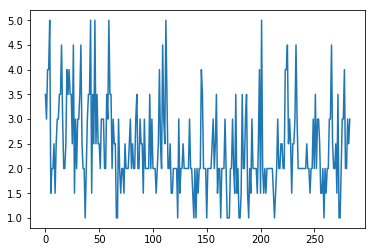

0.5547800824551126


In [67]:
x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
model = get_p_value(x_train, dep_var='mean_next_rating', ind_var='Prior_exp')

In [ ]:
dataset, labels, reg = get_p_value(x_held, dep_var='mean_next_rating', ind_var='Prior_exp')
pred = model.predict(dataset)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

In [65]:
x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_p_value(x_train, dep_var='emb', ind_var='Prior_exp')

IndexError: list index out of range

[['I have learned that the disease is either a mutagen, pathogen, or carcinogen. Moving forward, I am going to discover which one the disease on the island is.(2)', 'I have learned about different kind of microbes and diseases. I am going to continue to do this.(2)', 'I have just tested an egg that tested positive for pathogenic bacteria. I am going to continue to test foods.(2)', 'The first thing I did was collect information about different infections, how they reproduce, and whether they are infectious or not. Next, I talked to different people about their symptoms. Them, I began to test different foods.(4.5)', 'If I were asked to solve a similar problem, I would probably test the foods first to find out what the disease could possibly be. Then, I would find information about these possible diseases.(3)'], ["So far I've learned the illness is either a pathogen, carcinogen or matagen and has been spread through camp over the last few days.(2)", "It's likely the illness is influenza, 

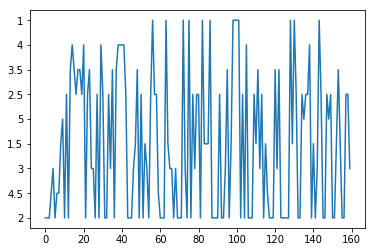

1.3089974938207405e-05


In [14]:
x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_p_value(x_train, dep_var='mean_next_rating', ind_var='Prior_exp')

In [4]:
print(x['1A0003'])

{'pretest': 9.0, 'posttest': 13.0, 'tutorial_complete': True, 'logs': [{'event': [0, 0, 0, 0, 1, 0, 0, 0], 'goal': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'response_emb': [0.19300055706580865, -0.18410546716809484, -0.04879944829001959, -0.8675356332697732, -0.8435272970406813, 0.2968947538226063, -0.46147871363536686, -0.6913215273817284, 0.7334789169736233, -0.885711141798667, 0.4061960687666397, 0.6460993814404072, 0.7930749511935087, 0.3185202326785179, -0.8927308017995381, -0.1248254792474568, 0.749024935520239, -0.17894319370700829, 0.07070817516042949, 0.4856005698715362, 0.15407610954935014, -0.27883630555698735, 0.18439933859474356, -0.07105955892610316, -0.3345476633785591, -0.8603838103271726, -0.47918834231408347, 0.990184513927084, -0.4145413539920857, -0.303247947946913, 0.9621681654266707, -0.7944690146726305], 'next_rating': '2', 'response_number': 0}, {'event': [0, 0, 0, 1, 1, 0, 0, 0], 'goal': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [91]:
x_train, x_held = create_train_test_split(x)
get_p_value(x_train)

0.0004307940080544581


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [92]:
x_train, x_held = create_train_test_split(x)
get_p_value(x_train, dep_var='mean_next_rating')

0.00023504379783778617


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [93]:
x_train, x_held = create_train_test_split(x)
get_p_value(x_train, dep_var='posttest', ind_var='Prior_exp')

0.00024241698275506707


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [94]:
x_train, x_held = create_train_test_split(x)
get_p_value(x_train, dep_var='mean_next_rating', ind_var='Prior_exp')

1.3089974938207405e-05


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [100]:
x_train, x_held = create_train_test_split(x)
get_p_value(x_train, dep_var='pretest', ind_var='Gender')

0.005188542257077655


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [101]:
x_train, x_held = create_train_test_split(x)
get_p_value(x_train, dep_var='pretest', ind_var='Prior_exp')

0.01902315547394484


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


In [102]:
x_train, x_held = create_train_test_split(x)
get_p_value(x_train, dep_var='pretest', ind_var='posttest')

0.29566742124213186


In [120]:
x_train, x_held = create_train_test_split(x)
get_table(x_train)

{'1A0003': {'s_id': '1A0003', 'Gender': 'female', 'Prior_exp': 'low_exp', 'pretest': 0.5294117647058824, 'posttest': 0.7647058823529411, 'mean_next_rating': 2.0372340425531914}, '1A0008': {'s_id': '1A0008', 'Gender': '3', 'Prior_exp': 'low_exp', 'pretest': 0.4117647058823529, 'posttest': 0.6470588235294118, 'mean_next_rating': 4.239583333333333}, '1A0011': {'s_id': '1A0011', 'Gender': 'male', 'Prior_exp': 'high_exp', 'pretest': 0.35294117647058826, 'posttest': 0.29411764705882354, 'mean_next_rating': 4.505050505050505}, '1A0015': {'s_id': '1A0015', 'Gender': 'female', 'Prior_exp': 'low_exp', 'pretest': 0.23529411764705882, 'posttest': 0.23529411764705882, 'mean_next_rating': 2.2421875}, '1A0022': {'s_id': '1A0022', 'Gender': 'female', 'Prior_exp': 'high_exp', 'pretest': 0.058823529411764705, 'posttest': 0.17647058823529413, 'mean_next_rating': 2.368181818181818}, '1A0024': {'s_id': '1A0024', 'Gender': 'male', 'Prior_exp': 'high_exp', 'pretest': 0.6470588235294118, 'posttest': 0.3529411

In [ ]:
#45% males have low posttest scores, 32% females have low posttest scores

In [124]:
x_train, x_held = create_train_test_split(x)
get_table(x_train)

{'1A0003': {'s_id': '1A0003', 'Gender': 'female', 'Prior_exp': 'low_exp', 'pretest': 0.5294117647058824, 'posttest': 0.7647058823529411, 'mean_next_rating': 2.0372340425531914}, '1A0008': {'s_id': '1A0008', 'Gender': '3', 'Prior_exp': 'low_exp', 'pretest': 0.4117647058823529, 'posttest': 0.6470588235294118, 'mean_next_rating': 4.239583333333333}, '1A0011': {'s_id': '1A0011', 'Gender': 'male', 'Prior_exp': 'high_exp', 'pretest': 0.35294117647058826, 'posttest': 0.29411764705882354, 'mean_next_rating': 4.505050505050505}, '1A0015': {'s_id': '1A0015', 'Gender': 'female', 'Prior_exp': 'low_exp', 'pretest': 0.23529411764705882, 'posttest': 0.23529411764705882, 'mean_next_rating': 2.2421875}, '1A0022': {'s_id': '1A0022', 'Gender': 'female', 'Prior_exp': 'high_exp', 'pretest': 0.058823529411764705, 'posttest': 0.17647058823529413, 'mean_next_rating': 2.368181818181818}, '1A0024': {'s_id': '1A0024', 'Gender': 'male', 'Prior_exp': 'high_exp', 'pretest': 0.6470588235294118, 'posttest': 0.3529411

In [ ]:
# 79% low experience: females
# 63% high experience: males

# 17% males: low experience
# 55% females: low experience

In [18]:
#x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_table(x_train)

0.05882352941176466
{'low_exp': {'low_rating': {'low_posttest': 15, 'high_posttest': 9}, 'high_rating': {'low_posttest': 6, 'high_posttest': 20}}, 'high_exp': {'low_rating': {'low_posttest': 12, 'high_posttest': 15}, 'high_rating': {'low_posttest': 1, 'high_posttest': 11}}}
{'male': {'low_exp': 16, 'high_exp': 26}, 'female': {'low_exp': 34, 'high_exp': 13}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_rating

In [14]:
#x_train, x_held = create_train_test_split(x)
x_train = filter_students(x_train)
get_table(x_train)

0.02974223397224058
{'low_exp': {'low_rating': {'low_posttest': 15, 'high_posttest': 9}, 'high_rating': {'low_posttest': 6, 'high_posttest': 20}}, 'high_exp': {'low_rating': {'low_posttest': 12, 'high_posttest': 15}, 'high_rating': {'low_posttest': 1, 'high_posttest': 11}}}
{'male': {'low_exp': 16, 'high_exp': 26}, 'female': {'low_exp': 34, 'high_exp': 13}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 22, 'high_lg': 25, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_rating

In [38]:
x_train, x_held = create_train_test_split(x)
print(len(x_train))
x_train = filter_students(x_train)
print(len(x_train))
get_table(x_train)

124
94
0.05882352941176466
{'male': {'low_exp': 7, 'high_exp': 35}, 'female': {'low_exp': 26, 'high_exp': 21}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_ratings': 0.48851765926965035}}
{'low_exp': {'low_pretest': 13, 'high_pretest': 20, 'sum_pretest': 0.37254901960784315}, 'high_exp': {'low_pretest': 17, 'high_pretest': 39, 'sum_pretest': 0.4212184873949579}}
{'low_exp': {'low_posttest': 14, 'high_posttes

0.05882352941176466
{'male': {'low_exp': 7, 'high_exp': 35}, 'female': {'low_exp': 26, 'high_exp': 21}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_ratings': 0.48851765926965035}}
{'low_exp': {'low_pretest': 13, 'high_pretest': 20, 'sum_pretest': 0.37254901960784315}, 'high_exp': {'low_pretest': 17, 'high_pretest': 39, 'sum_pretest': 0.4212184873949579}}
{'low_exp': {'low_posttest': 14, 'high_posttest': 19,

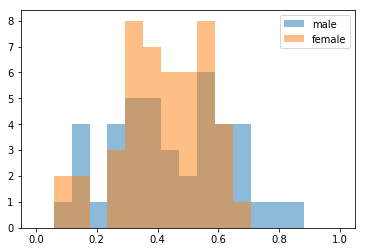

In [41]:
#x_train, x_held = create_train_test_split(x)
get_table(x_train)
get_gender_distribution(x_train, param='pretest')

0.05882352941176466
{'male': {'low_exp': 7, 'high_exp': 35}, 'female': {'low_exp': 26, 'high_exp': 21}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_ratings': 0.48851765926965035}}
{'low_exp': {'low_pretest': 13, 'high_pretest': 20, 'sum_pretest': 0.37254901960784315}, 'high_exp': {'low_pretest': 17, 'high_pretest': 39, 'sum_pretest': 0.4212184873949579}}
{'low_exp': {'low_posttest': 14, 'high_posttest': 19,

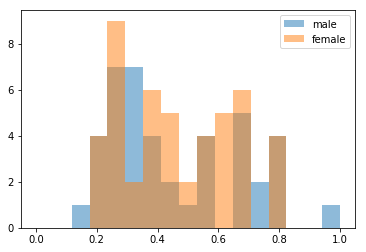

In [42]:
#x_train, x_held = create_train_test_split(x)
get_table(x_train)
get_gender_distribution(x_train, param='posttest')

0.05882352941176466
{'male': {'low_exp': 7, 'high_exp': 35}, 'female': {'low_exp': 26, 'high_exp': 21}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_ratings': 0.48851765926965035}}
{'low_exp': {'low_pretest': 13, 'high_pretest': 20, 'sum_pretest': 0.37254901960784315}, 'high_exp': {'low_pretest': 17, 'high_pretest': 39, 'sum_pretest': 0.4212184873949579}}
{'low_exp': {'low_posttest': 14, 'high_posttest': 19,

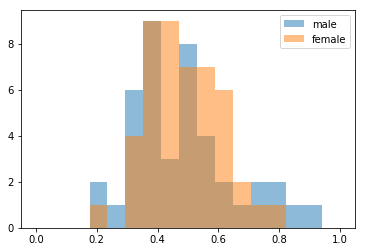

In [44]:
#x_train, x_held = create_train_test_split(x)
get_table(x_train)
get_gender_distribution(x_train, param='mean_next_rating')

0.05882352941176466
{'male': {'low_exp': 7, 'high_exp': 35}, 'female': {'low_exp': 26, 'high_exp': 21}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_ratings': 0.48851765926965035}}
{'low_exp': {'low_pretest': 13, 'high_pretest': 20, 'sum_pretest': 0.37254901960784315}, 'high_exp': {'low_pretest': 17, 'high_pretest': 39, 'sum_pretest': 0.4212184873949579}}
{'low_exp': {'low_posttest': 14, 'high_posttest': 19,

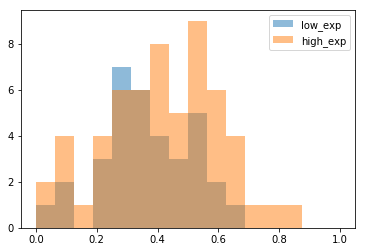

In [45]:
#x_train, x_held = create_train_test_split(x)
#x_train, x_val = create_train_test_split(x_train)
get_table(x_train)
get_exp_distribution(x_train, param='pretest')

0.05882352941176466
{'male': {'low_exp': 7, 'high_exp': 35}, 'female': {'low_exp': 26, 'high_exp': 21}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_ratings': 0.48851765926965035}}
{'low_exp': {'low_pretest': 13, 'high_pretest': 20, 'sum_pretest': 0.37254901960784315}, 'high_exp': {'low_pretest': 17, 'high_pretest': 39, 'sum_pretest': 0.4212184873949579}}
{'low_exp': {'low_posttest': 14, 'high_posttest': 19,

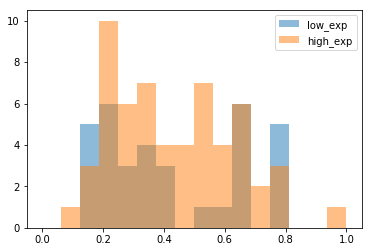

In [46]:
#x_train, x_held = create_train_test_split(x)
#x_train, x_val = create_train_test_split(x_train)
get_table(x_train)
get_exp_distribution(x_train, param='posttest')

0.05882352941176466
{'male': {'low_exp': 7, 'high_exp': 35}, 'female': {'low_exp': 26, 'high_exp': 21}}
{'male': {'low_pretest': 15, 'high_pretest': 27, 'sum_pretest': 0.4159663865546218}, 'female': {'low_pretest': 15, 'high_pretest': 32, 'sum_pretest': 0.3917396745932415}}
{'male': {'low_posttest': 19, 'high_posttest': 23, 'sum_posttest': 0.4285714285714285}, 'female': {'low_posttest': 15, 'high_posttest': 32, 'sum_posttest': 0.43679599499374205}}
{'male': {'low_lg': 22, 'high_lg': 20, 'sum_lg': 0.01260504201680672}, 'female': {'low_lg': 23, 'high_lg': 24, 'sum_lg': 0.045056320400500616}}
{'male': {'low_ratings': 26, 'high_ratings': 16, 'sum_ratings': 0.48420714492191474}, 'female': {'low_ratings': 25, 'high_ratings': 22, 'sum_ratings': 0.48851765926965035}}
{'low_exp': {'low_pretest': 13, 'high_pretest': 20, 'sum_pretest': 0.37254901960784315}, 'high_exp': {'low_pretest': 17, 'high_pretest': 39, 'sum_pretest': 0.4212184873949579}}
{'low_exp': {'low_posttest': 14, 'high_posttest': 19,

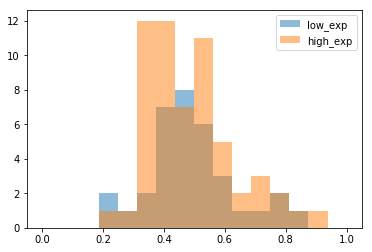

In [47]:
#x_train, x_held = create_train_test_split(x)
#x_train, x_val = create_train_test_split(x_train)
get_table(x_train)
get_exp_distribution(x_train, param='mean_next_rating')

In [ ]:
'''
Posttest score prediction:
Pretest scores have no information about learning gains. Therefore, what has lower learning gains will be predicted better.
Males and high experienced people have lower learning gains 
- hence posttest scores biased towards these students when only predicted with pre-test scores

'''